#### Q1 Defining Problem Statement and Analysing basic metrics

Which type of shows/movies to produce and how they can grow the business in different countries








*analysis of basic metrics is done below*

#### Q2  Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [1632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

netflix_data=pd.read_csv('netflix_data.csv',dtype='str')
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [1633]:
print(netflix_data.shape)
netflix_data['date_added']=netflix_data['date_added'].astype('Datetime64')
netflix_data.info()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   object        
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 825.8+ KB


In [1634]:
netflix_data.describe(include=np.object)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8807,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,74,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,1147,3207,1793,362,4


In [1635]:
netflix_data.describe(include=['datetime64'],datetime_is_numeric=True)

,date_added
count,8797
mean,2019-05-17 05:59:08.436967168
min,2008-01-01 00:00:00
25%,2018-04-06 00:00:00
50%,2019-07-02 00:00:00
75%,2020-08-19 00:00:00
max,2021-09-25 00:00:00


#### Q3 Non-Graphical Analysis: Value counts and unique attributes

In [1636]:
netflix_data.head(10)
netflix_data.index=netflix_data['show_id']

netflix_data.drop(labels='show_id',axis=1,inplace=True)

In [1637]:
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['type'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['type'].unique(),netflix_data['type'].nunique())

-------------------------------------VALUE COUNTS-----------------------------------
Movie      6131
TV Show    2676
Name: type, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
['Movie' 'TV Show'] 2


In [1638]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['director'].isnull().sum())
print("-------------------------------------PRE PROCESSING--------------------------------------")
director_df=netflix_data['director'].str.split(",").explode()
director_df=director_df.str.strip()
print(director_df)

print("-------------------------------------VALUE COUNTS-----------------------------------")
print(director_df.value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(director_df.nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
2634
-------------------------------------PRE PROCESSING--------------------------------------
show_id
s1       Kirsten Johnson
s2                   NaN
s3       Julien Leclercq
s4                   NaN
s5                   NaN
              ...       
s8803      David Fincher
s8804                NaN
s8805    Ruben Fleischer
s8806       Peter Hewitt
s8807        Mozez Singh
Name: director, Length: 9612, dtype: object
-------------------------------------VALUE COUNTS-----------------------------------
Rajiv Chilaka     22
Jan Suter         21
RaÃºl Campos      19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
4993


In [1639]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['country'].isnull().sum())
print("-------------------------------------PRE PROCESSING--------------------------------------")
country_df=netflix_data['country'].str.split(",").explode()
country_df=country_df.str.strip().to_frame().reset_index()
country_df=country_df.drop(country_df[country_df['country']==''].index.values,axis=0)

print(country_df)
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(country_df['country'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(country_df.nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
831
-------------------------------------PRE PROCESSING--------------------------------------
      show_id        country
0          s1  United States
1          s2   South Africa
2          s3            NaN
3          s4            NaN
4          s5          India
...       ...            ...
10845   s8803  United States
10846   s8804            NaN
10847   s8805  United States
10848   s8806  United States
10849   s8807          India

[10843 rows x 2 columns]
-------------------------------------VALUE COUNTS-----------------------------------
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 122, dtype: int64
-------------------------------------UNIQUE VALUE--------------

In [1640]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['cast'].isnull().sum())
print("-------------------------------------PRE PROCESSING--------------------------------------")
cast_df=netflix_data['cast'].str.split(",").explode()
cast_df=cast_df.str.strip()
print(cast_df)
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(cast_df.value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(cast_df.nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
825
-------------------------------------PRE PROCESSING--------------------------------------
show_id
s1                         NaN
s2                  Ama Qamata
s2                 Khosi Ngema
s2               Gail Mabalane
s2              Thabang Molaba
                 ...          
s8807         Manish Chaudhary
s8807             Meghna Malik
s8807            Malkeet Rauni
s8807           Anita Shabdish
s8807    Chittaranjan Tripathy
Name: cast, Length: 64951, dtype: object
-------------------------------------VALUE COUNTS-----------------------------------
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: cast,

In [1641]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['date_added'].isnull().sum())
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['date_added'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['date_added'].nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
10
-------------------------------------VALUE COUNTS-----------------------------------
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
1714


In [1642]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['release_year'].isnull().sum())
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['release_year'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['release_year'].nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
0
-------------------------------------VALUE COUNTS-----------------------------------
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
74


In [1643]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['rating'].isnull().sum())
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['rating'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['rating'].nunique())
print("-------------------------------------DURATION IN RATING-----------------------------")
temp_df=netflix_data[netflix_data['rating'].fillna("--").str.endswith('min')]
netflix_data.loc[temp_df.index,'duration']=netflix_data.loc[temp_df.index,'rating']
netflix_data.loc[temp_df.index,'rating']=np.full(3,np.NaN)
print("-----------------------------------AFTER SWAPPING-----------------------------------")
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['rating'].isnull().sum())
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['rating'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['rating'].nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
4
-------------------------------------VALUE COUNTS-----------------------------------
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
17
-------------------------------------DURATION IN RATING-----------------------------
-----------------------------------AFTER SWAPPING-----------------------------------
-------------------------------------NO OF NULL VALUES-----------------------------------
7
-------------------------------------VALUE COUNTS-----------------------------------
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-1

In [1644]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['duration'].isnull().sum())
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(netflix_data['duration'].value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(netflix_data['duration'].nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
0
-------------------------------------VALUE COUNTS-----------------------------------
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64
-------------------------------------UNIQUE VALUE-----------------------------------
220


In [1645]:
print("-------------------------------------NO OF NULL VALUES-----------------------------------")
print(netflix_data['listed_in'].isnull().sum())
print("-------------------------------------PRE PROCESSING--------------------------------------")
genre_df=netflix_data['listed_in'].str.split(",").explode()
genre_df=genre_df.str.strip()
print(genre_df)
print("-------------------------------------VALUE COUNTS-----------------------------------")
print(genre_df.value_counts())
print("-------------------------------------UNIQUE VALUE-----------------------------------")
print(genre_df.nunique())

-------------------------------------NO OF NULL VALUES-----------------------------------
0
-------------------------------------PRE PROCESSING--------------------------------------
show_id
s1                  Documentaries
s2         International TV Shows
s2                      TV Dramas
s2                   TV Mysteries
s3                 Crime TV Shows
                   ...           
s8806    Children & Family Movies
s8806                    Comedies
s8807                      Dramas
s8807        International Movies
s8807            Music & Musicals
Name: listed_in, Length: 19323, dtype: object
-------------------------------------VALUE COUNTS-----------------------------------
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children 

#### Q4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

#### Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

#### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis 

#### 4.2 For categorical variable(s): Boxplot 

#### 4.3 For correlation: Heatmaps, Pairplots

####  5. Missing Value & Outlier check (Treatment optional) 

#### 6.Insights based on Non-Graphical and Visual Analysis 

#### 6.1 Comments on the range of attributes

#### 6.2 Comments on the distribution of the variables and relationship between them

#### 6.3 Comments for each univariate and bivariate plot

#### 7. Business Insights  - Should include patterns observed in the data along with what you can infer from it

In [1646]:
#merging all the Series togther 
merged_df=director_df.to_frame().merge(cast_df,how='inner',on='show_id').merge(country_df,how='inner',on='show_id').merge(genre_df,how='inner',on='show_id')
merged_df.dropna(how='all',subset=['cast','director'],inplace=True)
netflix_merged_df=netflix_data.merge(merged_df,how='inner',on='show_id')
netflix_merged_df.drop(inplace=True,axis=1,labels=['director_x','cast_x','country_x','listed_in_x'])


In [1647]:
netflix_merged_df.rename({'director_y':'director','cast_y':'cast','country_y':'country','listed_in_y':'listed_in'},axis=1,inplace=True)
netflix_merged_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows


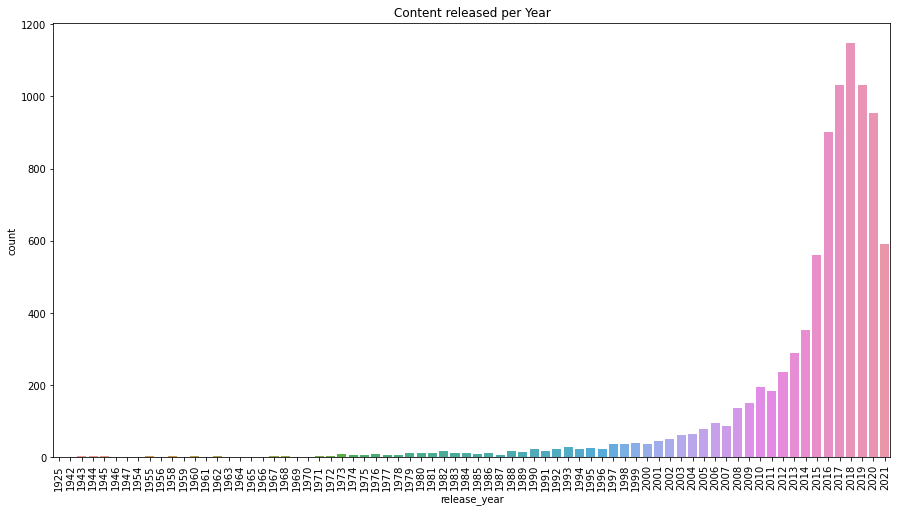

In [1648]:
new_order=netflix_data['release_year'].sort_values().unique()

plt.figure(figsize=(15,8))
sns.countplot(x=netflix_data['release_year'],order=new_order)
plt.title('Content released per Year')
plt.xticks(rotation=90)
plt.show()

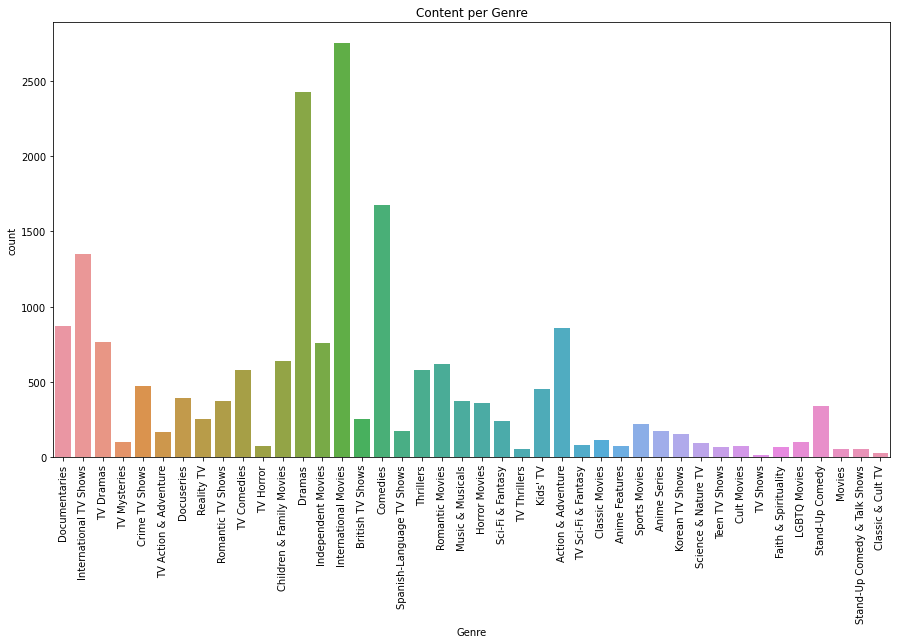

In [1649]:
# Genre count plot 
plt.figure(figsize=(15,8))
sns.countplot(x=genre_df)
plt.xlabel("Genre")
plt.title("Content per Genre")
plt.xticks(rotation=90)
plt.show()

In [1650]:
genre_df=genre_df.to_frame().merge(netflix_data['release_year'],how='inner',on='show_id')


In [1651]:
genre_df.reset_index(inplace=True)
genre_year_df=pd.pivot_table(data=genre_df,columns='listed_in',index='release_year',values='show_id',aggfunc='count').fillna(0)
genre_year_df

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
1925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,89.0,6.0,10.0,34.0,55.0,1.0,0.0,164.0,54.0,1.0,...,8.0,57.0,77.0,4.0,9.0,4.0,2.0,3.0,5.0,68.0
2018,81.0,8.0,24.0,37.0,69.0,2.0,1.0,178.0,79.0,1.0,...,28.0,82.0,109.0,11.0,15.0,7.0,0.0,7.0,8.0,83.0
2019,44.0,6.0,18.0,26.0,82.0,3.0,0.0,159.0,92.0,0.0,...,35.0,75.0,133.0,16.0,16.0,14.0,2.0,16.0,14.0,71.0


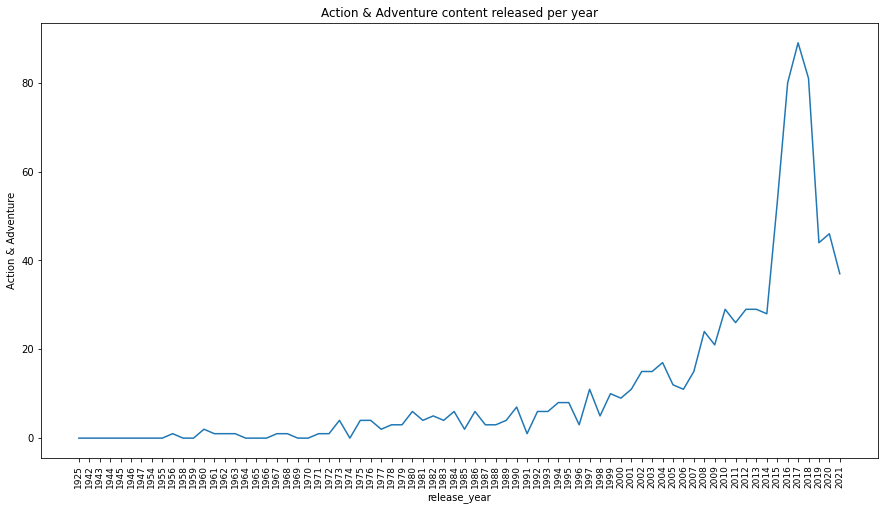

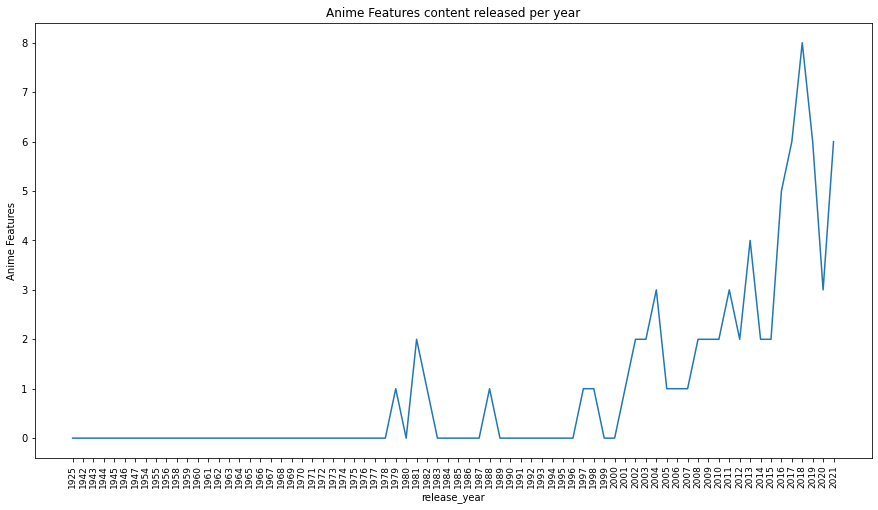

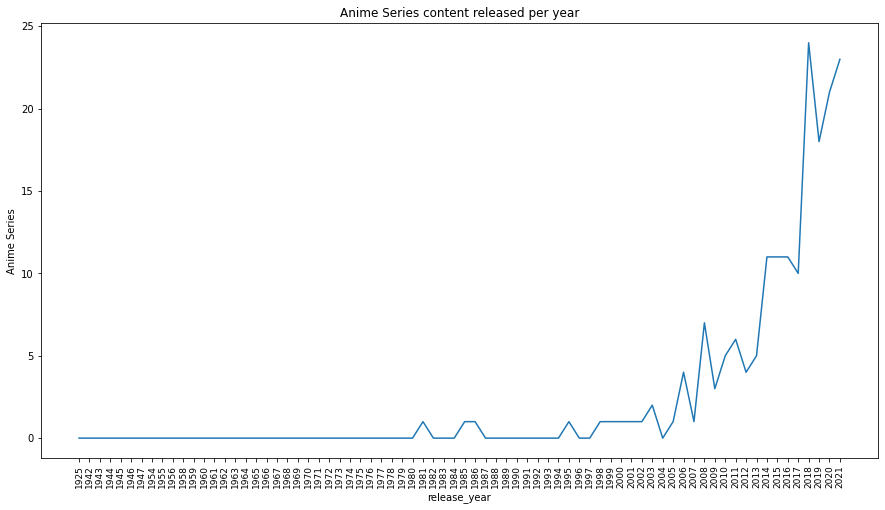

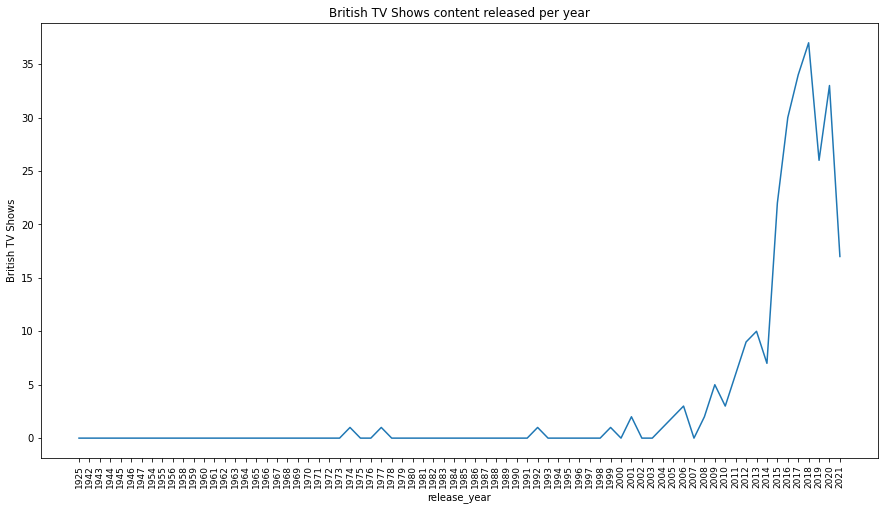

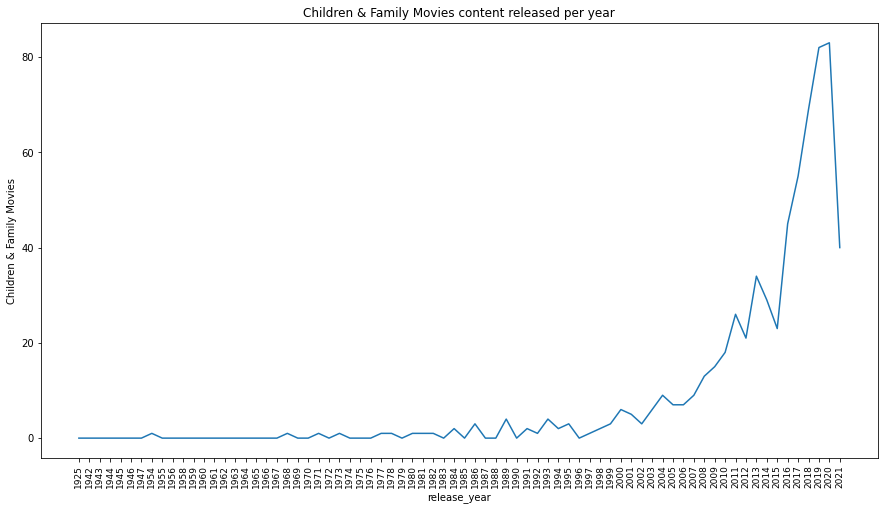

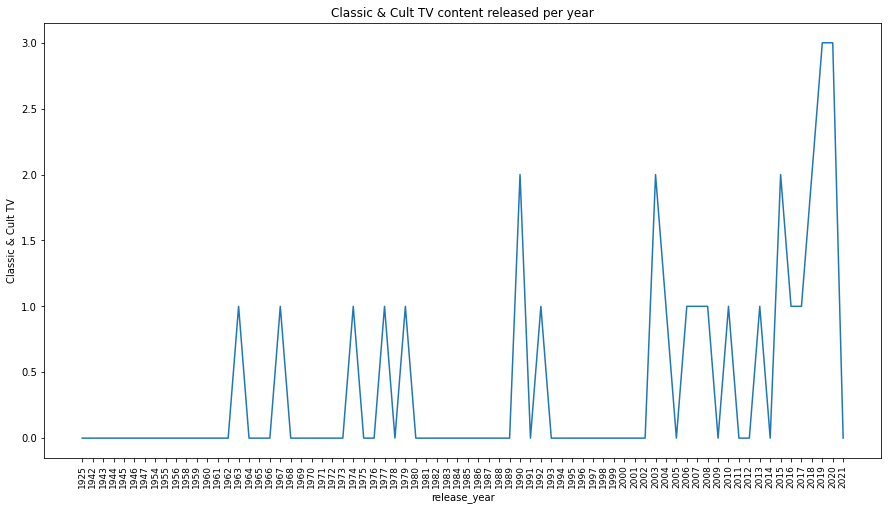

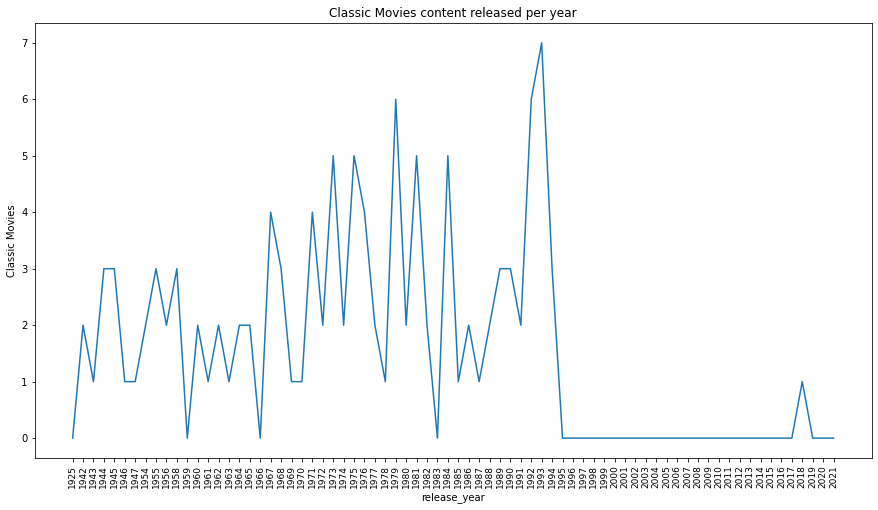

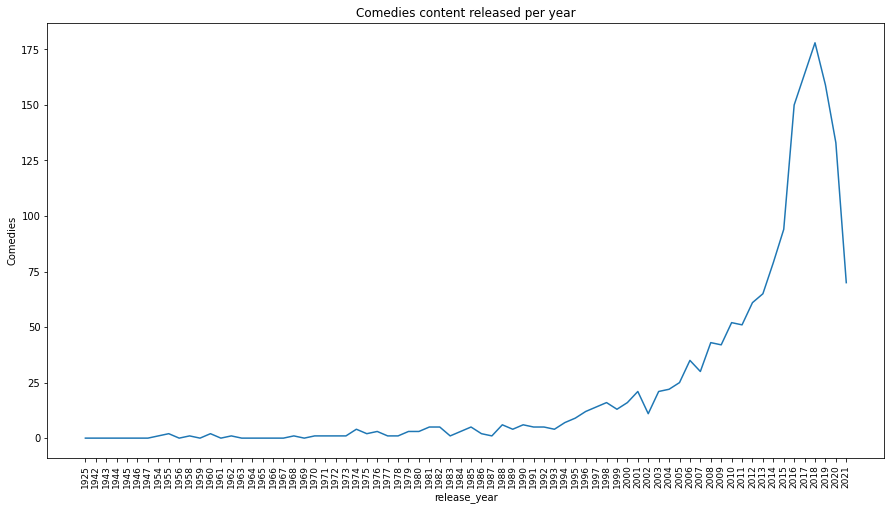

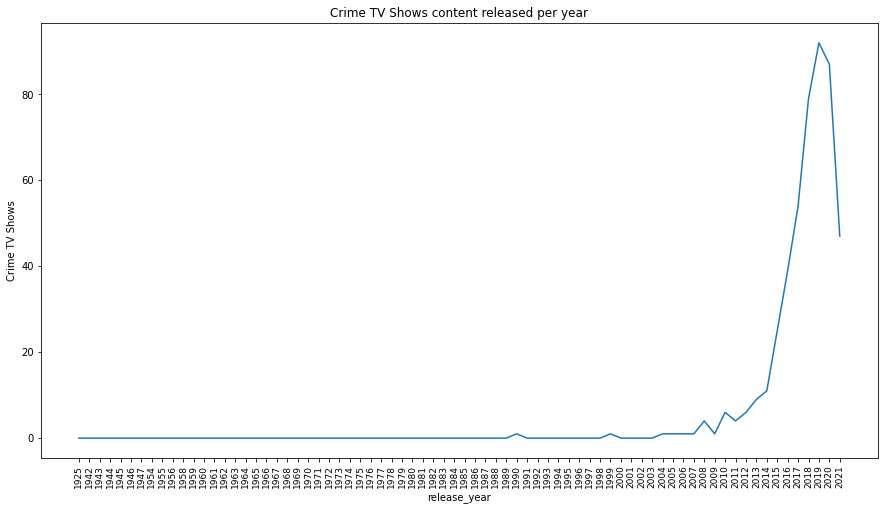

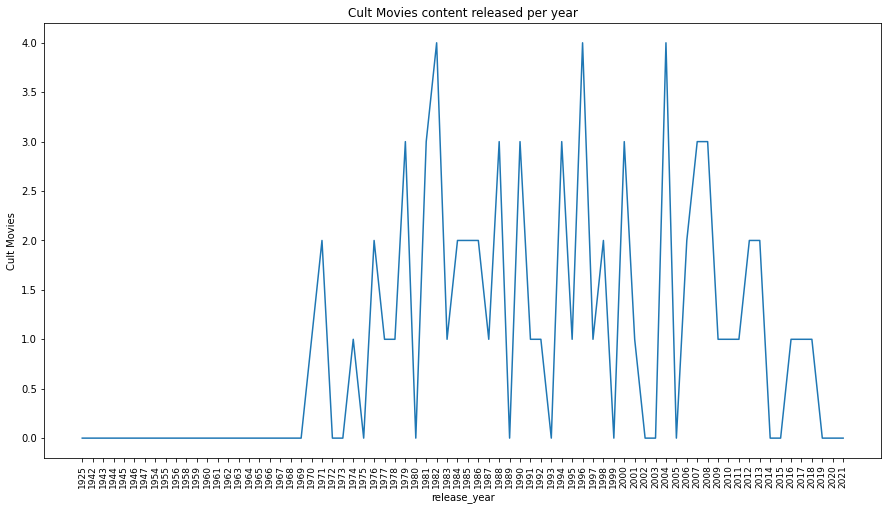

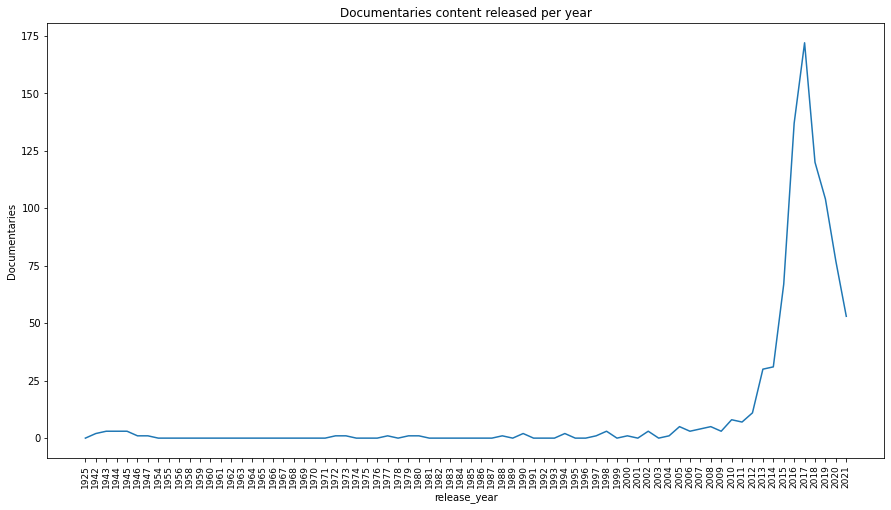

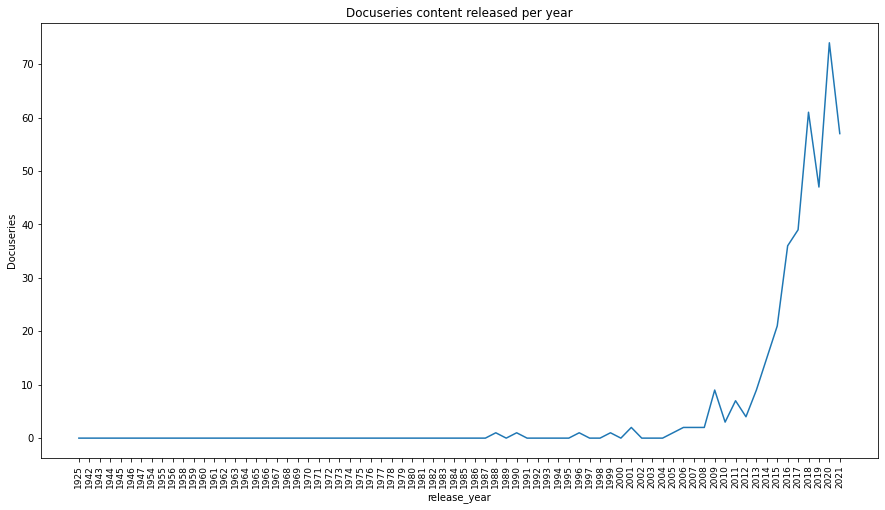

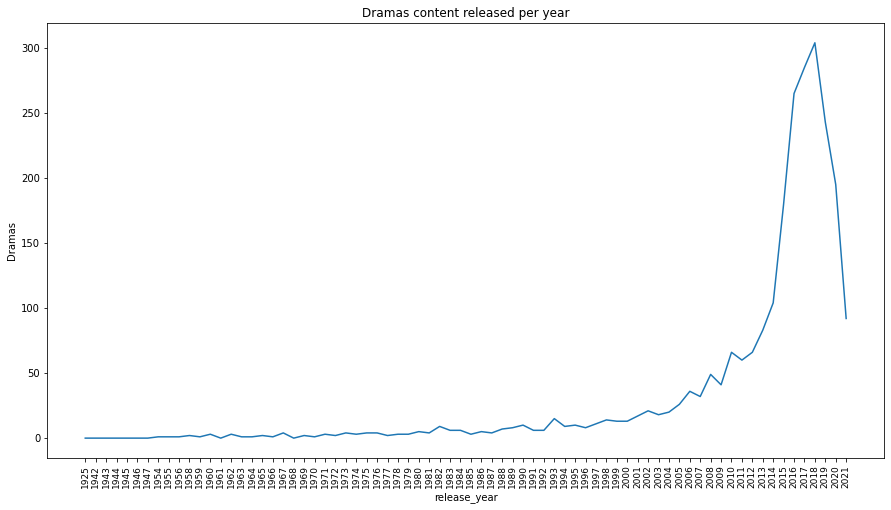

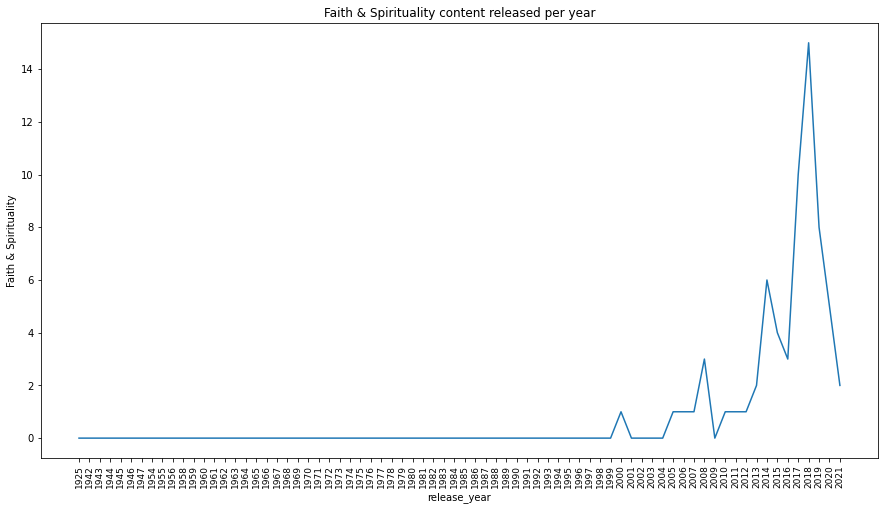

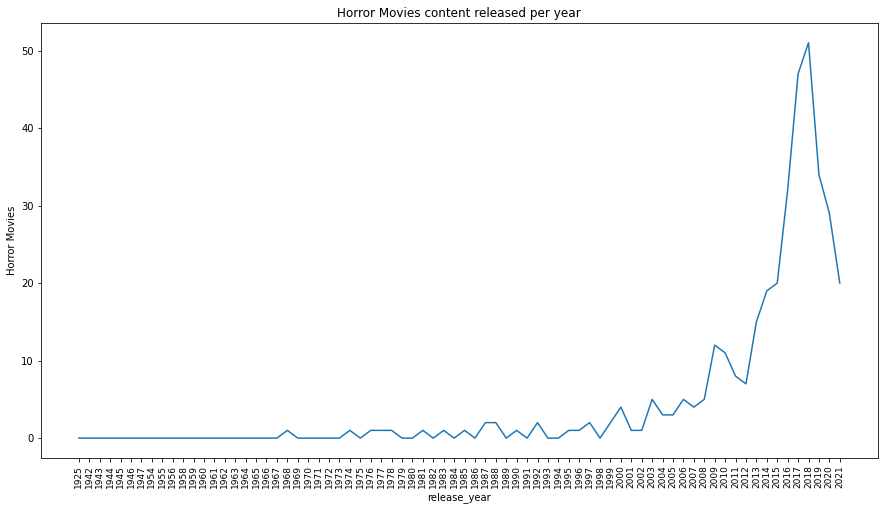

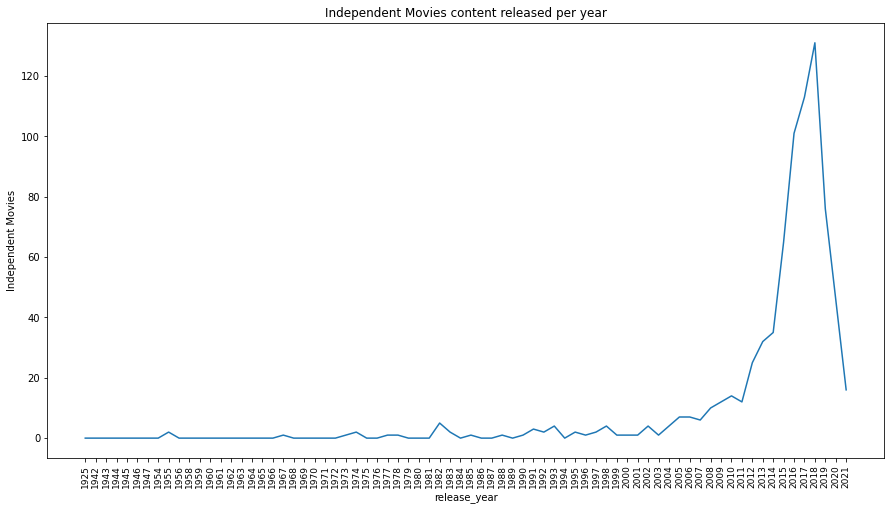

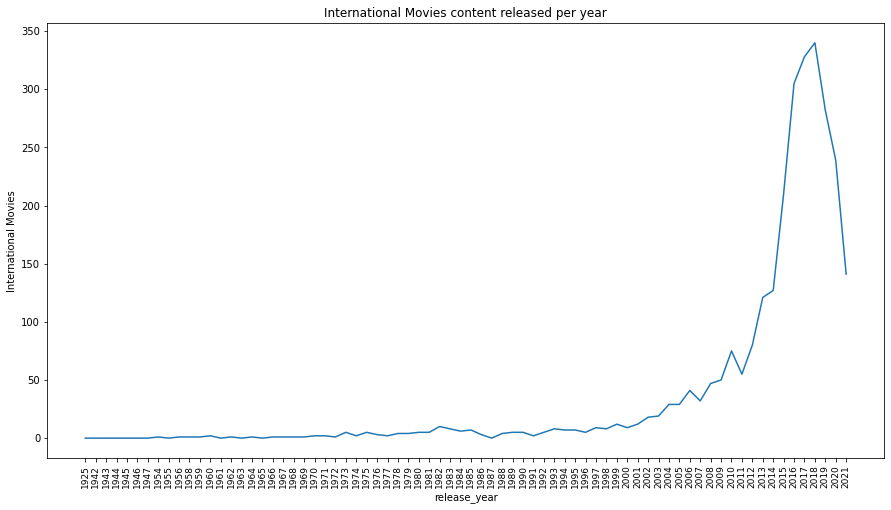

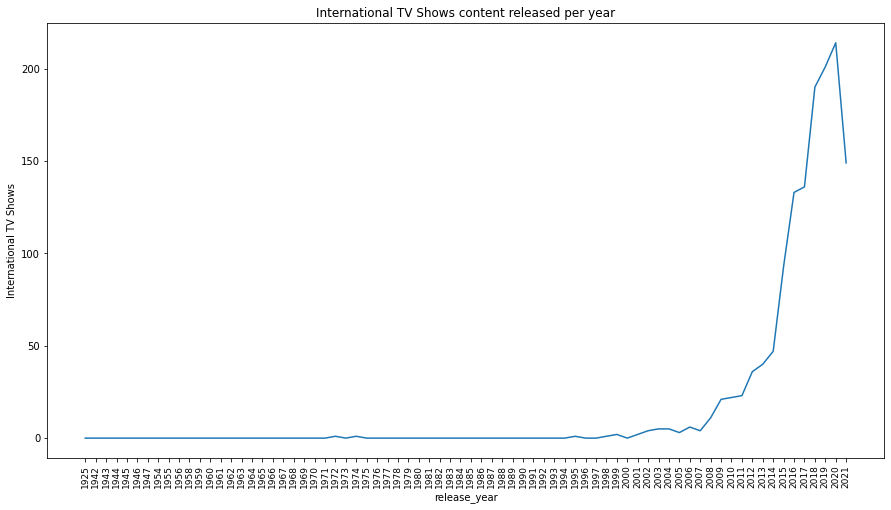

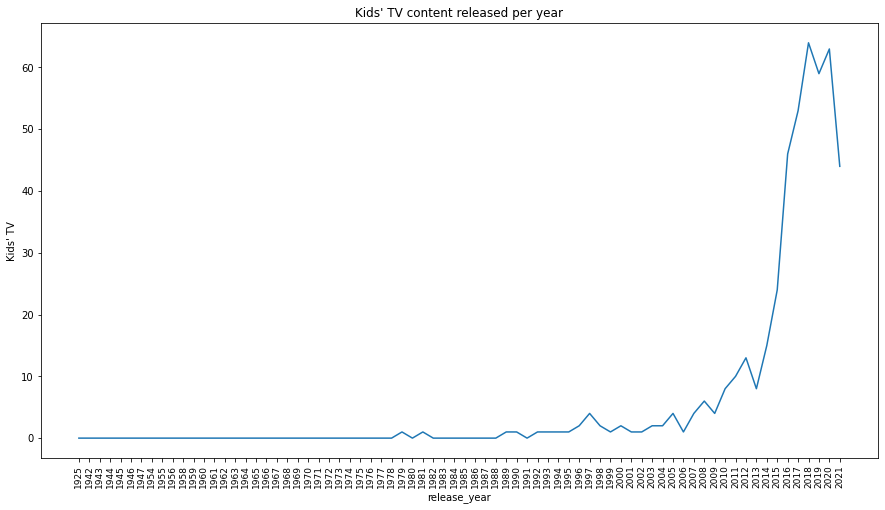

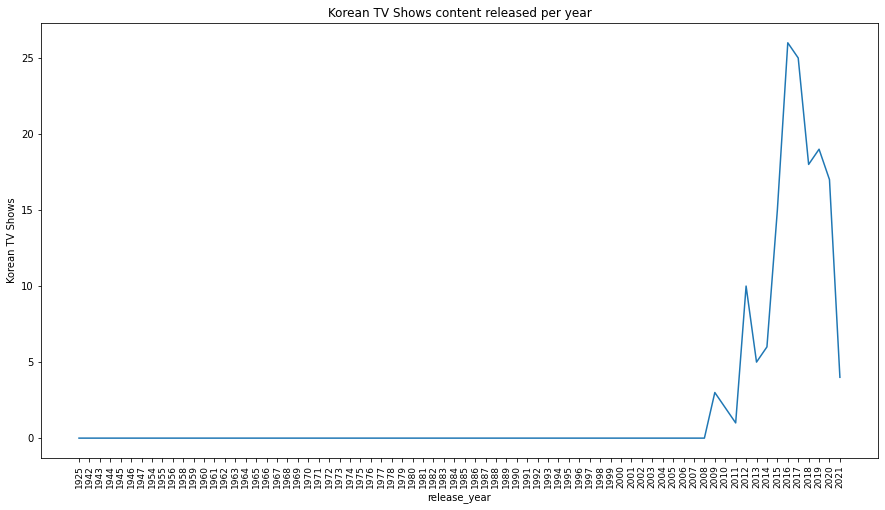

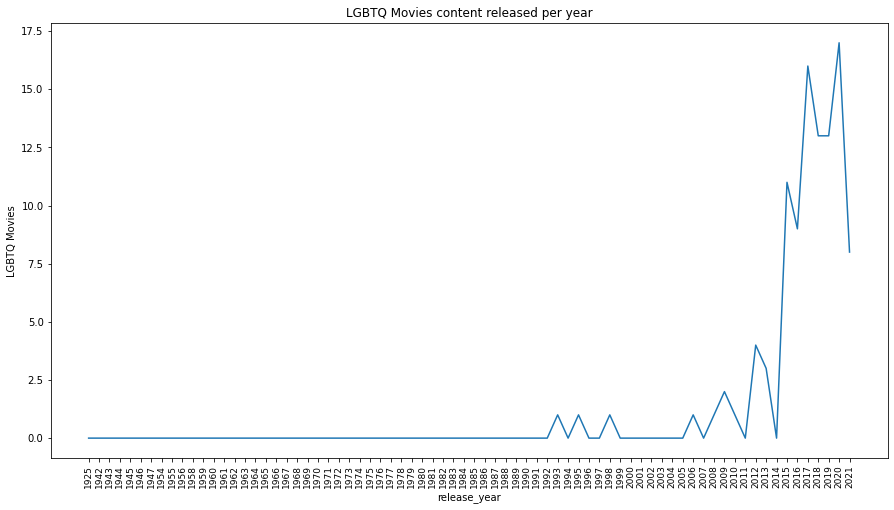

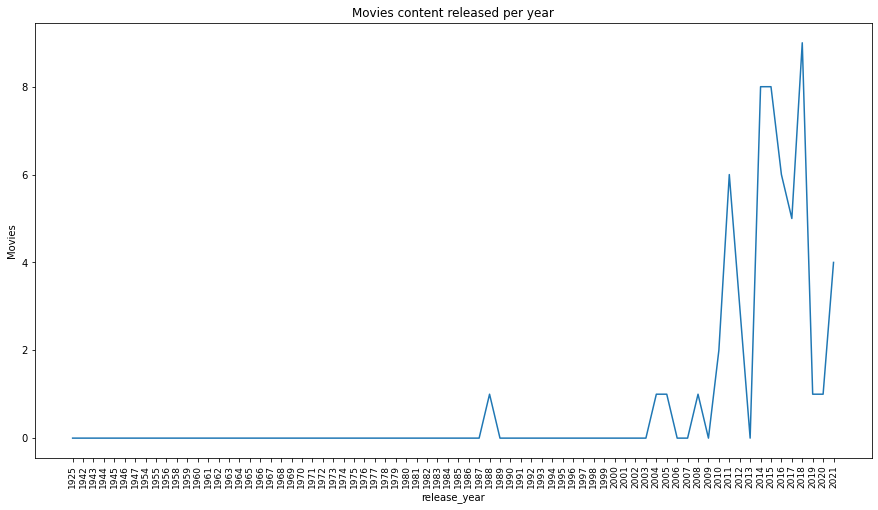

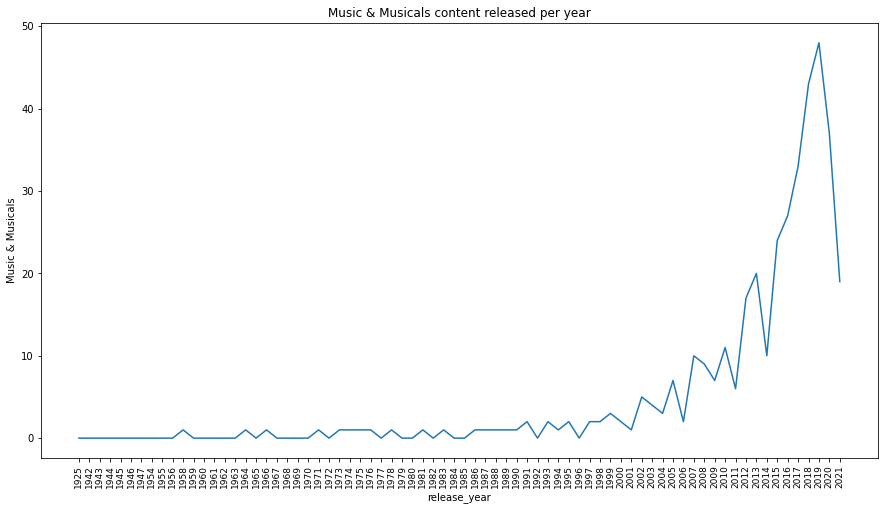

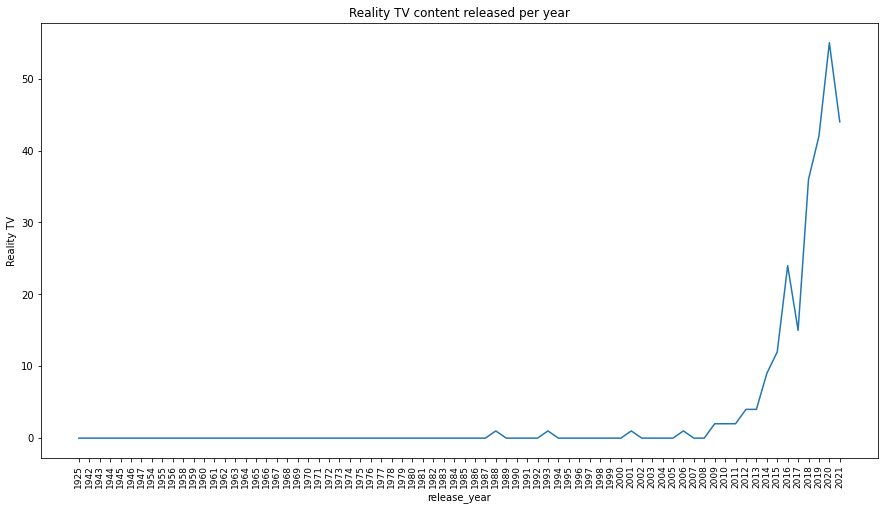

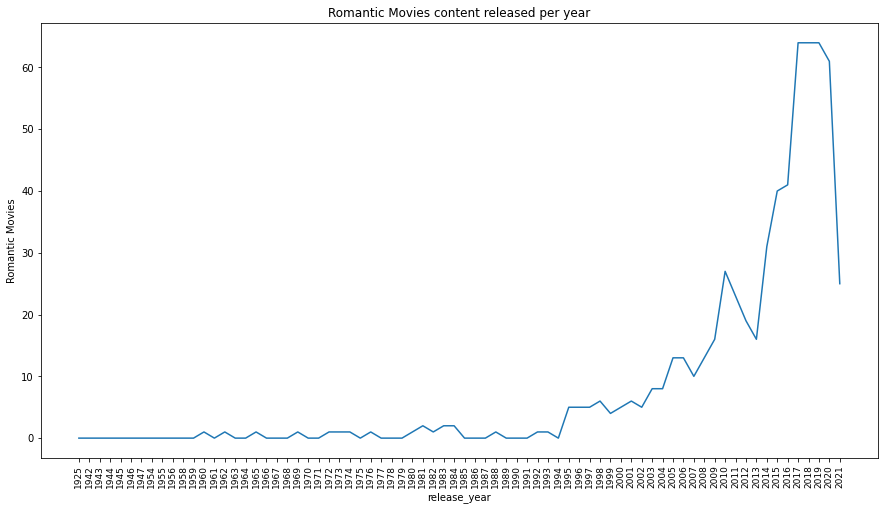

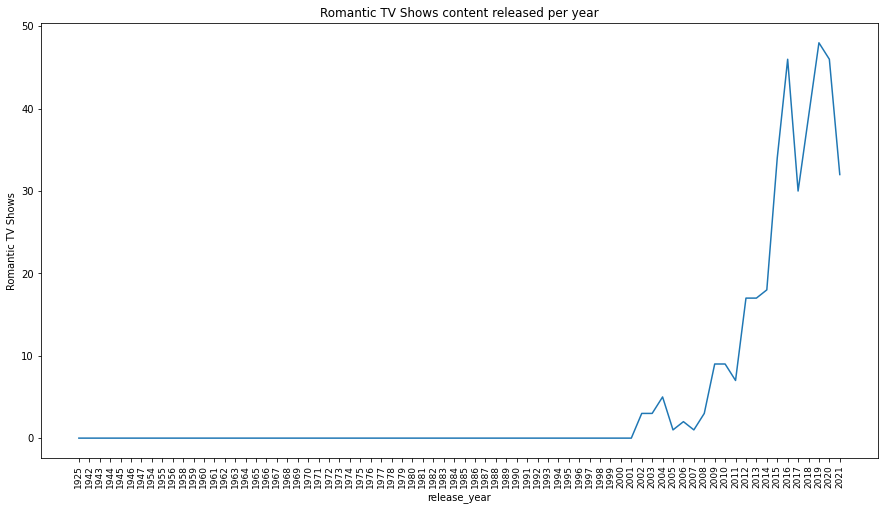

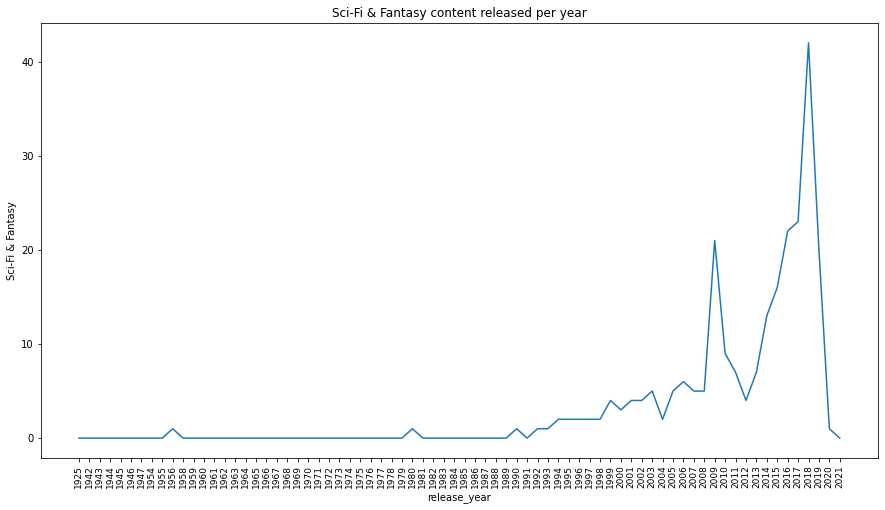

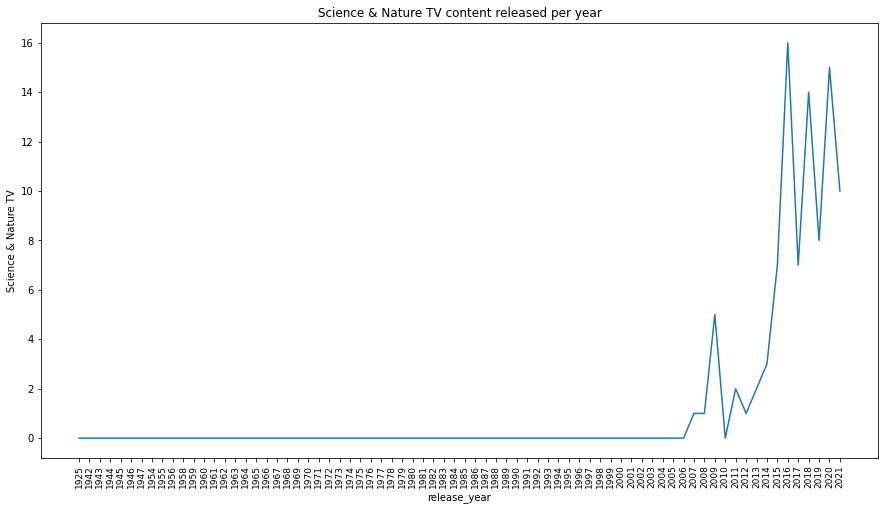

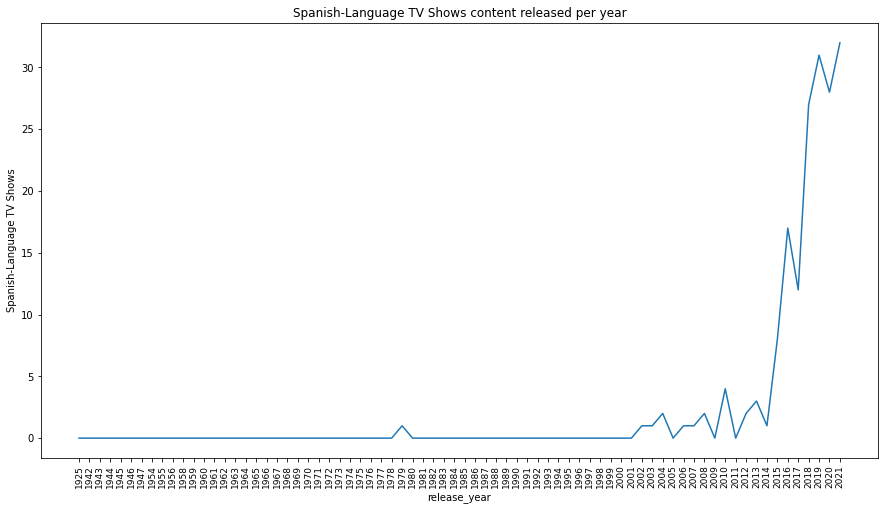

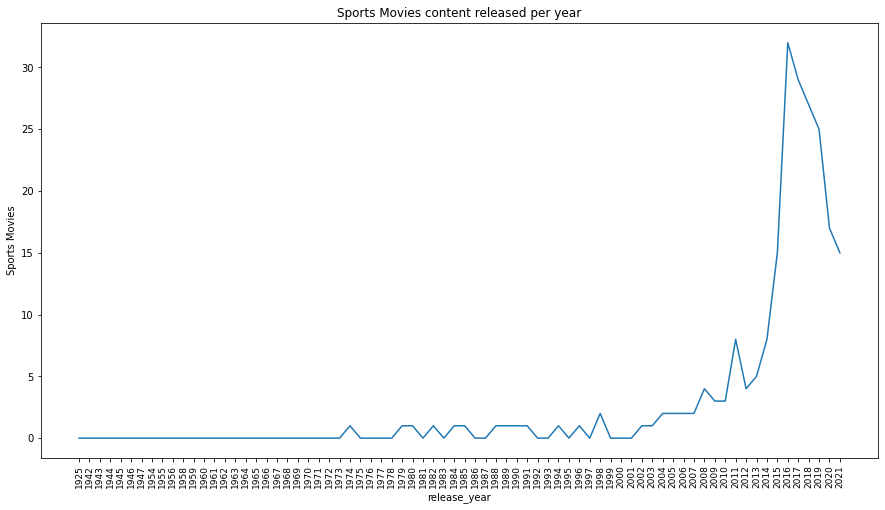

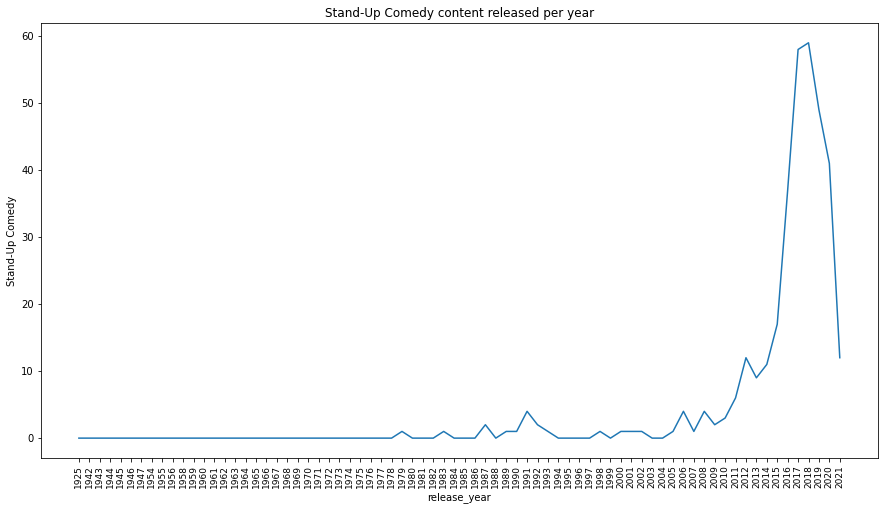

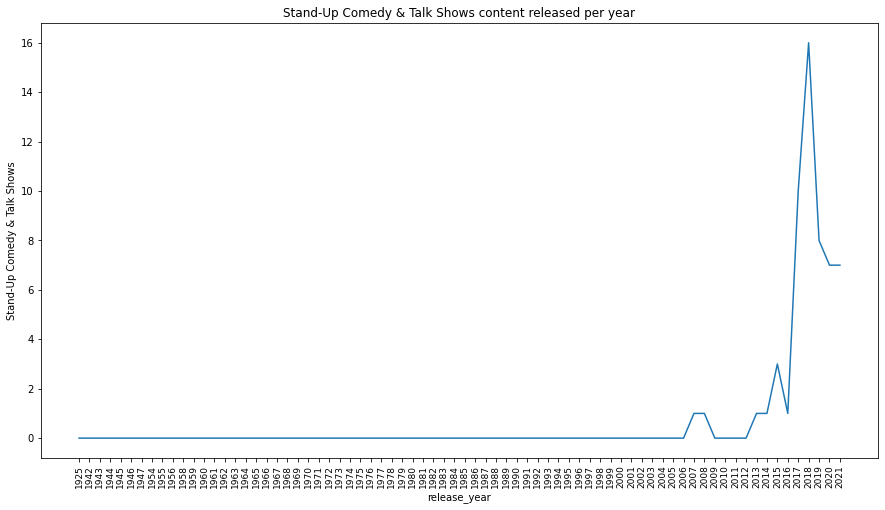

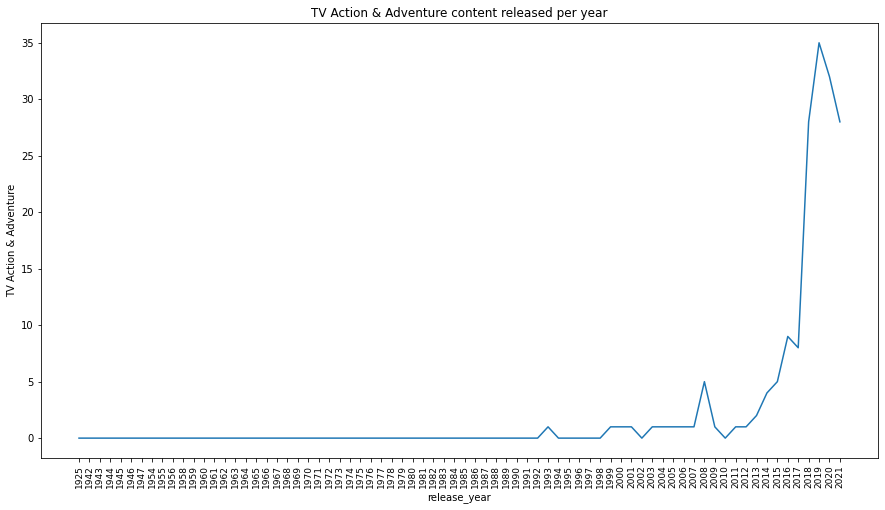

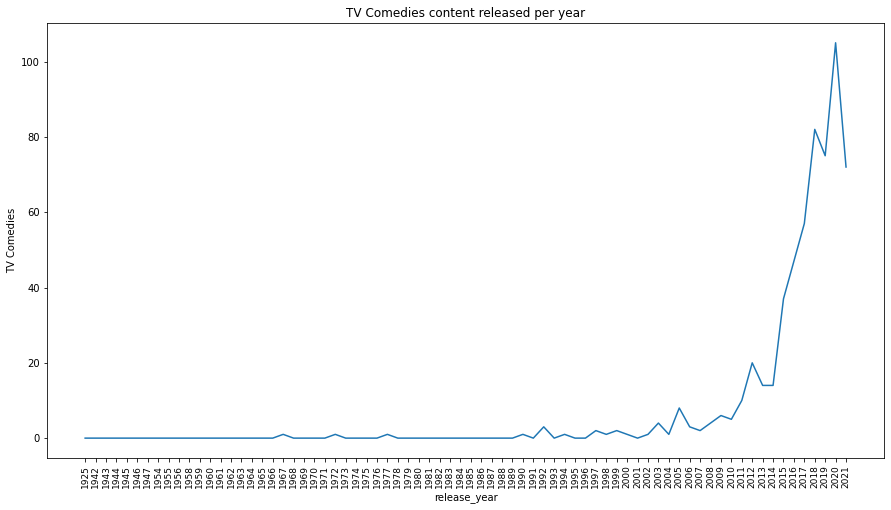

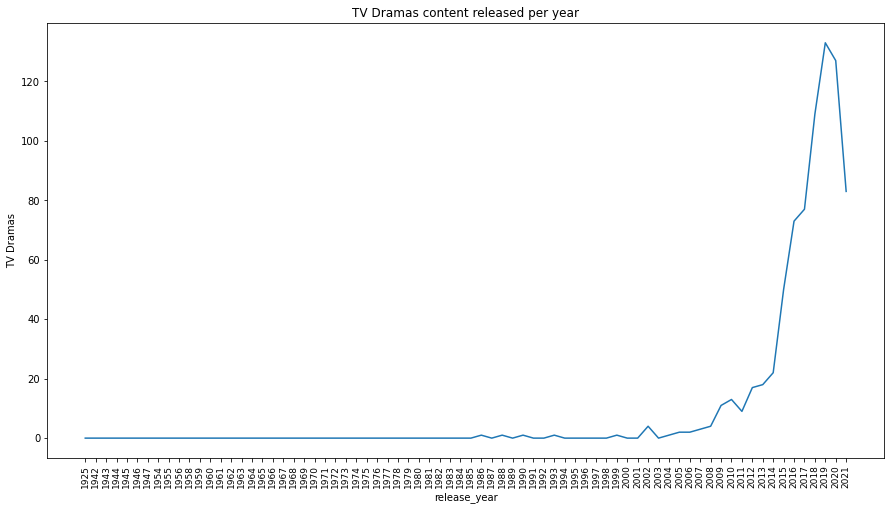

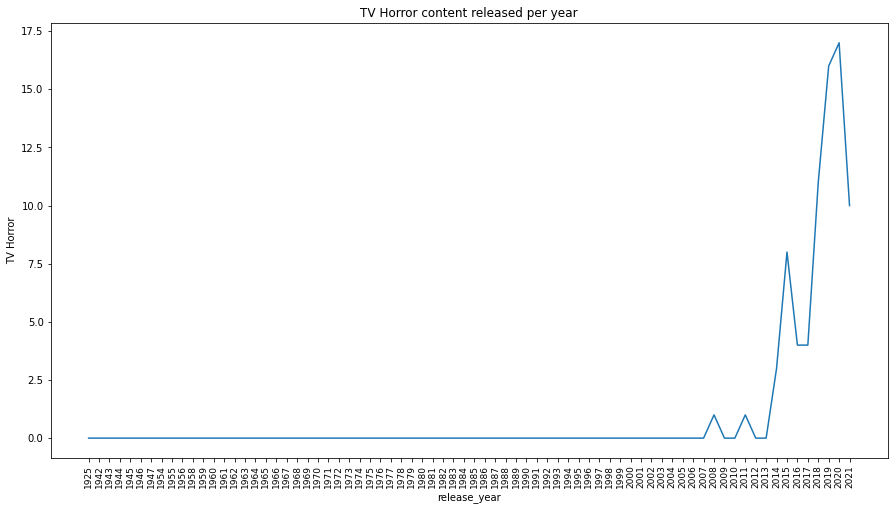

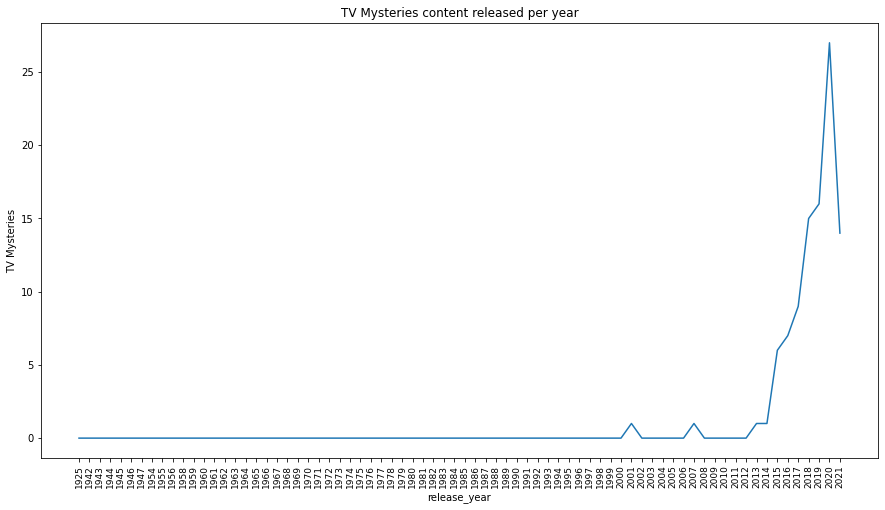

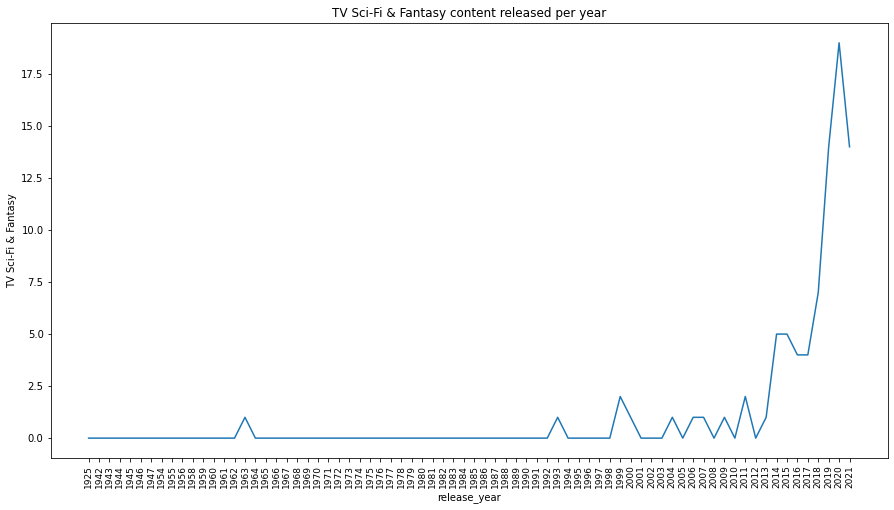

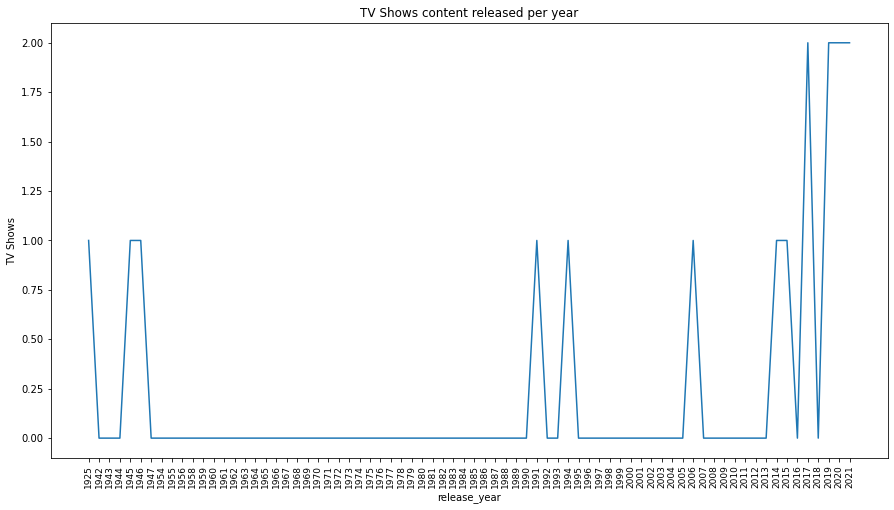

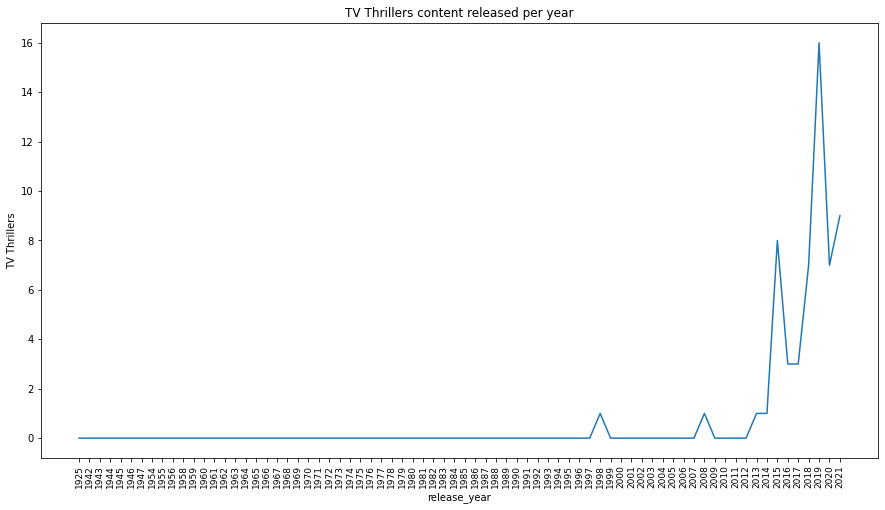

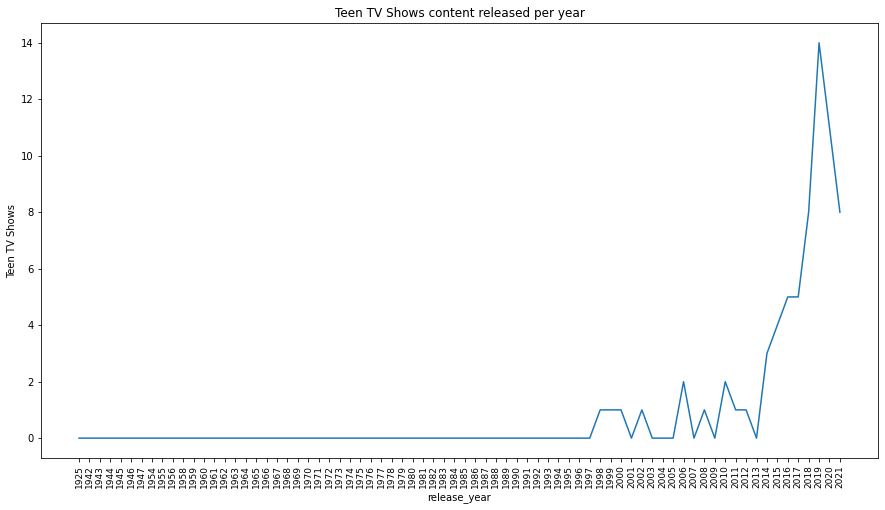

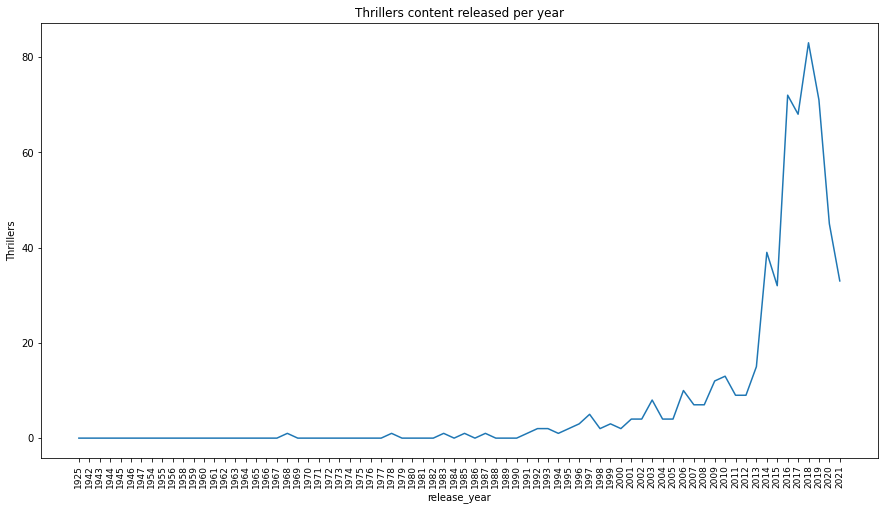

In [1652]:


for i in genre_year_df.columns.values:
    
    plt.figure(figsize=(15,8))
    sns.lineplot(data=genre_year_df,x=genre_year_df.index,y=i)
    plt.title(i+' content released per year')
    plt.xticks(rotation=90,fontsize=9)
    plt.show()

In [1653]:

top3_genre_year_df=genre_df.groupby(by=['release_year','listed_in']).count().reset_index().sort_values(by=['release_year','show_id'],ascending=False).groupby(by='release_year').head(3)

genre_year_pivot_table_df=pd.pivot_table(data=top3_genre_year_df,index='release_year',columns='listed_in',values='show_id').reset_index()
genre_year_pivot_table_df.columns.name=None
pl.bar(genre_year_pivot_table_df,x='release_year',y=genre_year_pivot_table_df.columns[1:],title="TOP 3 GENRE PER YEAR")

In [1654]:
genre_year_pivot_table_df['release_year']=genre_year_pivot_table_df['release_year'].astype(int)
year_30_df=genre_year_pivot_table_df[genre_year_pivot_table_df['release_year']>1990]
pl.bar(year_30_df,x='release_year',y=genre_year_pivot_table_df.columns[1:],title="TOP 3 GENRE PER YEAR from 1991 till 2021")

### Inferences

Inferences from --------------
1. Top 3 Genre per year 
     1. International Movies,Dramas,Comedies are evergreen genre which with every passing year has shown a increase in number.
     2. A new trend of International TV,Documentaries shows increasing year after year.
     3. Over 30 year movies/Tv shows on global level has shift from Classical movies,Action and Adventure,comedies  genre to 
        international movies,international tv shows, Dramas, Documentaries
2. Genre changing with each year

    Took some assumption such as COVID 19 causing the release number of each movie/TV Show going down while checking growth for each genre took in consideration till 2018.
    
    
    
     
      1. UPWARD TREND GRAPH - Action & Adventure,Anime features,anime series,docuseries,dramas,horror movies,comedies,crime tv show,international movies,international tv shows,kids TV,LGBTQ movies,movies,music and musicals,reality TV,romantic movies,romantic TV show ,science and Nature TV,Spanish-Language TV Shows,Sports Movies,Stand up comedy,Stand up comedy and talk shows,TV action and Adventure,TV Comedies,TV Dramas,TV horror,Tv mysteries,TV sci-fi and fantasy,TV thriller,Teen TV Shows,Thriller,british tv show,children and family movies,documentaries,faith and spirtuality,independent movies,korean TV Shows,Sci-Fi and Fantasy

    2. DOWNWARD TREND GRAPH - classic movies,cult movies
    3. NETURAL TREND GRAPH - classic and cult tv,Tv shows
     
     
**Exception to above assumption was few genre which increased even during covid docuseries,anime series,reality TV,Spanish-Language TV Shows**

In [1655]:
genre_type_df=genre_df.merge(netflix_data['type'],how='inner',on='show_id')
genre_type_df

,show_id,listed_in,release_year,type
0,s1,Documentaries,2020,Movie
1,s2,International TV Shows,2021,TV Show
2,s2,TV Dramas,2021,TV Show
3,s2,TV Mysteries,2021,TV Show
4,s3,Crime TV Shows,2021,TV Show
...,...,...,...,...
19318,s8806,Children & Family Movies,2006,Movie
19319,s8806,Comedies,2006,Movie
19320,s8807,Dramas,2015,Movie
19321,s8807,International Movies,2015,Movie


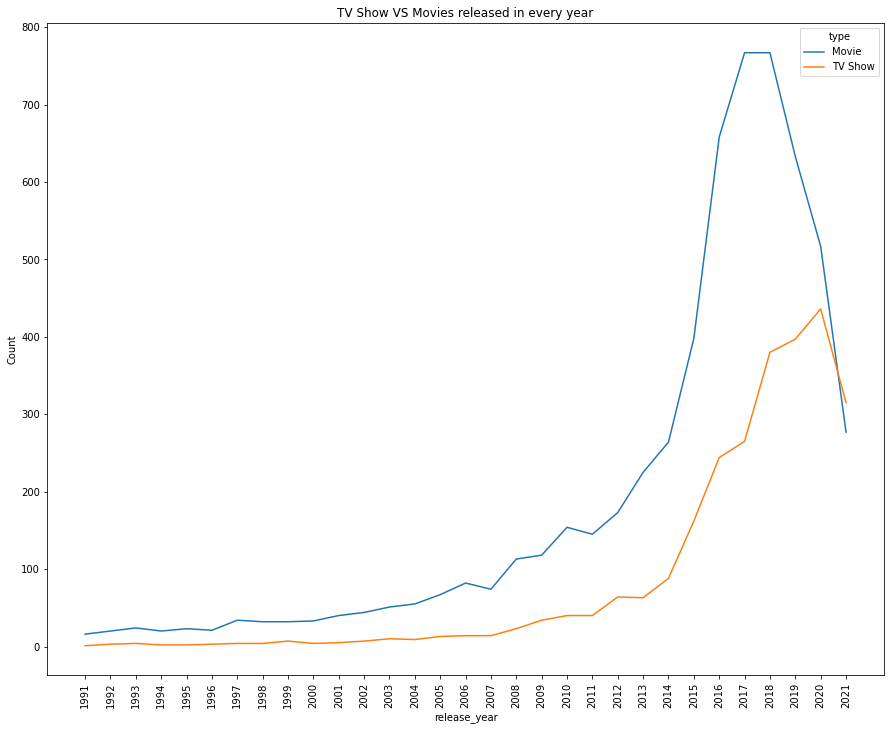

In [1656]:
movie_tv_show_df=netflix_data.loc[(netflix_data['release_year'].astype('int')>1990),['release_year','type']].reset_index().groupby(by=['type','release_year']).count().reset_index().rename({'show_id':'Count'},axis=1)
movie_tv_show_df=movie_tv_show_df.sort_values(by='release_year',ascending=True)
plt.figure(figsize=(15,12))
sns.lineplot(data=movie_tv_show_df,x='release_year',y='Count',hue='type')
plt.title('TV Show VS Movies released in every year')
plt.xticks(rotation=90)
plt.show()


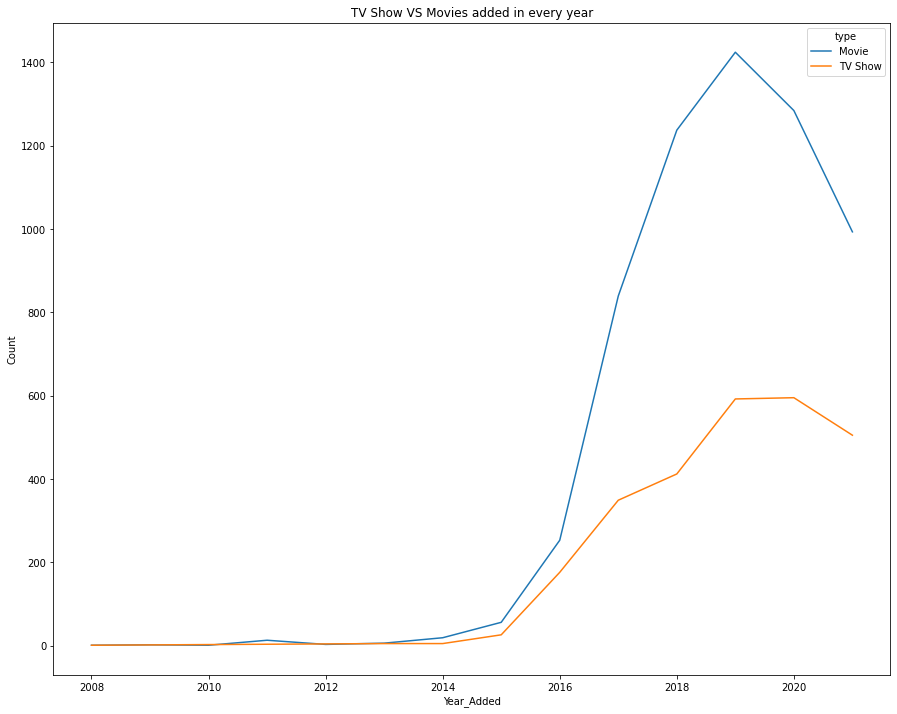

In [1657]:
added_year_df=netflix_data.loc[(netflix_data['date_added'].dt.year>1990),'date_added'].dt.year.to_frame()
added_year_df=added_year_df.merge(netflix_data['type'],how='inner',on='show_id').reset_index().groupby(by=['type','date_added']).count().reset_index().rename({'date_added':'Year_Added','show_id':'Count'},axis=1)
plt.figure(figsize=(15,12))
sns.lineplot(data=added_year_df,x='Year_Added',y="Count",hue='type')
plt.title("TV Show VS Movies added in every year")
plt.show()

### Inferences

Inference from ---------------

TV Show and Movies released in every year and TV Show and Movies added in every year

1. Movies are more added every year in comparision to TV Show same for release every year.
2. But Year 2021 showed a exception where more tv show were released in comparision to movies and which later got added to netflix platform.


In [1658]:
genre_movies_df=genre_type_df[genre_type_df['type']=='Movie'].drop('type',axis=1)
genre_movies_pivot_df=pd.pivot_table(data=genre_movies_df,index='release_year',columns='listed_in',values='show_id',aggfunc='count').reset_index()
genre_movies_pivot_df.columns.name=None

pl.bar(genre_movies_pivot_df,x='release_year',y=genre_movies_pivot_df.columns[1:],title="Movies released per year in various genre")

In [1659]:
top_4_movies_genre_year_df=genre_movies_df.groupby(['release_year','listed_in']).count().reset_index().sort_values(by=['release_year','show_id'],ascending=False).groupby('release_year').head(4).rename({'show_id':'Count'},axis=1)
top_4_movies_genre_year_df=top_4_movies_genre_year_df[top_4_movies_genre_year_df['release_year'].astype('int')>1990]
pl.bar(top_4_movies_genre_year_df,x='release_year',y='Count',color='listed_in',title="Top 4 genre for movie every year")


### Inferences

Inferences from --------------

1. Top 4 Movies Genre per year
    1. It clearly show the shift of movies genre from 1991 (Stand-up Comedy,Independent movie,classic movies) to 2021(international movies,Dramas,comedies,documentaries)

In [1660]:
top_4_TV_Show_genre_df=genre_type_df[(genre_type_df['type']=='TV Show') & (genre_type_df['release_year'].astype('int')>1990)].drop('type',axis=1).groupby(by=['release_year','listed_in']).count().reset_index().sort_values(by=['release_year','show_id'],ascending=False).groupby('release_year').head(4).rename({'show_id':'Count'},axis=1)
pl.bar(top_4_TV_Show_genre_df,x='release_year',y='Count',color='listed_in',title="Top 4 Genre for TV show from year 1991 to 2021")

### Inferences

Inferences from --------------

1. Top 4 TV Show Genre per year
    1. It clearly show the shift of TV Show genre from 1991 (TV Show,Kids TV) to 2021 (international TV Show,TV Dramas,TV Comedies,DocSeries,Crime TV Show)

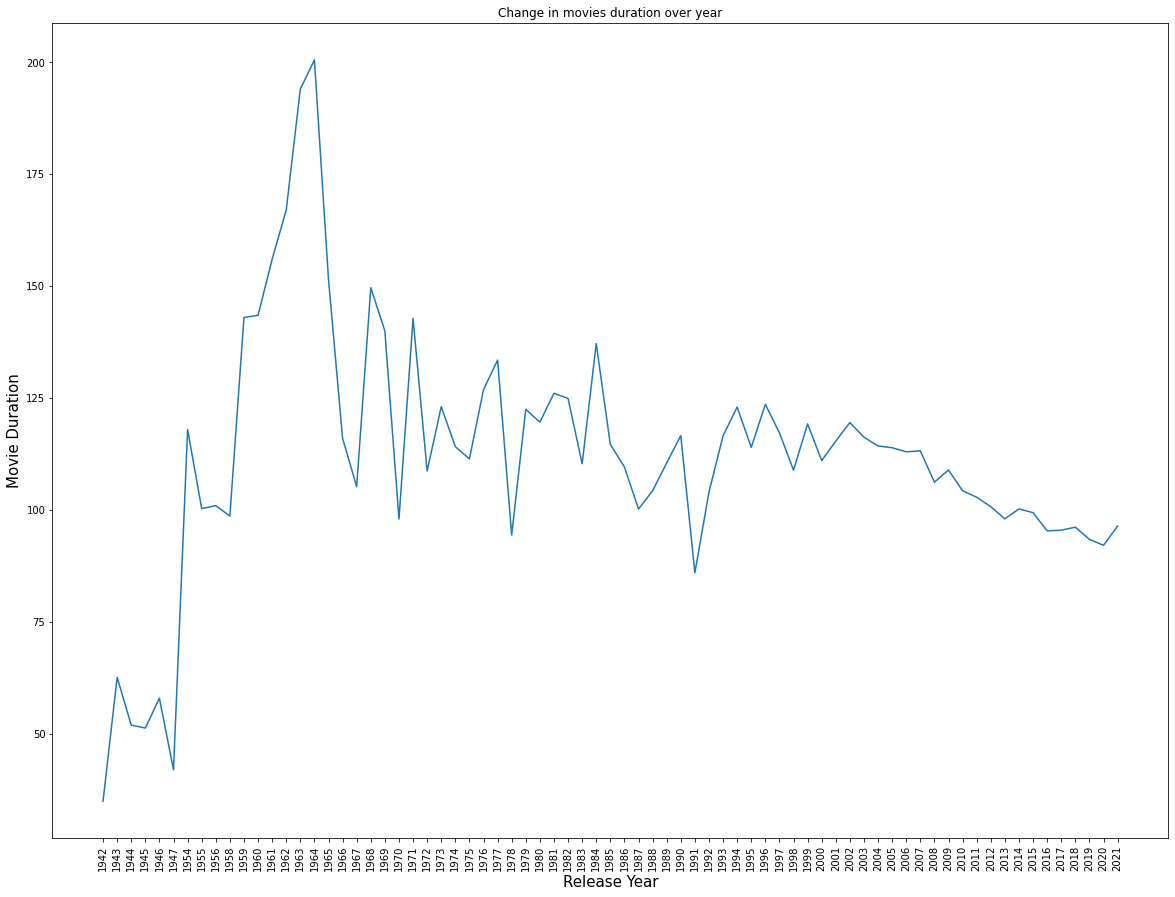

In [1661]:
# Change in movies duration over year
duration_year_df=netflix_data.loc[netflix_data['type']=='Movie',['type','release_year','duration']]
duration_year_df['duration']=duration_year_df['duration'].str.split()
duration_year_df=duration_year_df.explode(column='duration')
duration_year_df=duration_year_df[~(duration_year_df['duration']=='min')]
duration_year_df['duration']=duration_year_df['duration'].astype('int')
duration_year_df=duration_year_df.groupby(by='release_year').agg({'duration':'mean'}).reset_index()


plt.figure(figsize=(20,15))
sns.lineplot(duration_year_df,x='release_year',y='duration')
plt.xlabel("Release Year",fontsize=15)
plt.ylabel("Movie Duration",fontsize=15)
plt.title('Change in movies duration over year')
plt.xticks(rotation=90)
plt.show()

### Inferences

Inferences from --------------

1. Change in duration over years
    1. From above graph we can clearly say that duration increased upto 3 hours till 1964 but after that average duration of movies per year went down and got consistent around the range of 2 hours to 1 hours and 40 min from 1990 to 2021

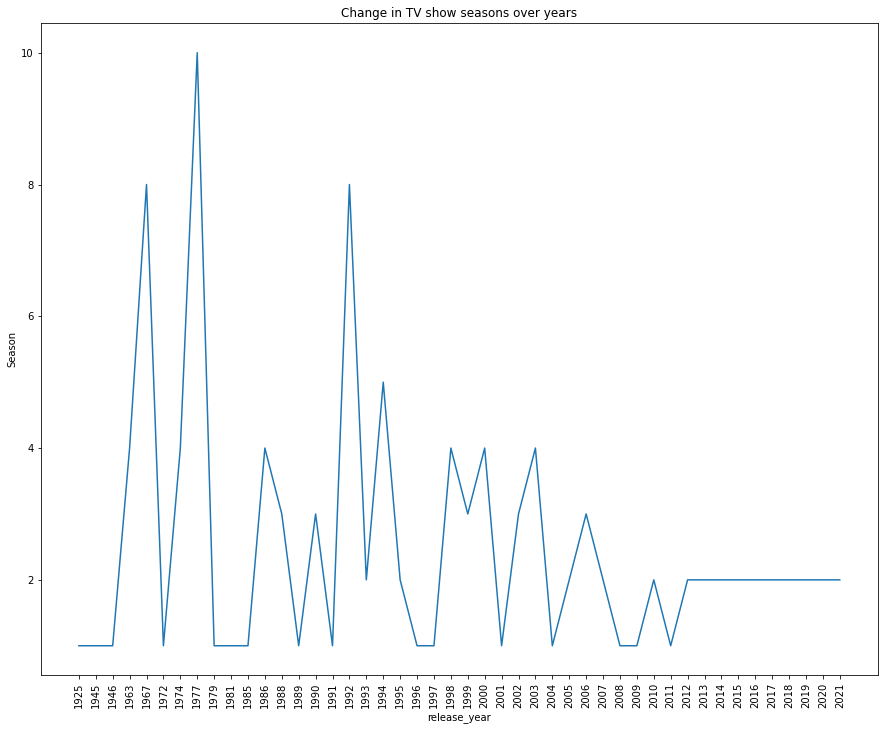

In [1662]:
season_year_df=netflix_data.loc[netflix_data['type']=='TV Show',['release_year','duration']]
season_year_df[['duration','faltu']]=season_year_df['duration'].str.split(expand=True)
season_year_df=season_year_df.drop('faltu',axis=1)
season_year_df['duration']=season_year_df['duration'].astype(int)
season_year_df=season_year_df.groupby('release_year').mean().round().reset_index().rename({"duration":"Season"},axis=1)
plt.figure(figsize=(15,12))
sns.lineplot(season_year_df,x='release_year',y='Season')
plt.title('Change in TV show seasons over years')
plt.xticks(rotation=90)
plt.show()

### Inferences

Inferences from --------------

1. Change in Season over years
    1. From above graph we can clearly say that number of season released were high till 1995 but after 2010 it become consistent on 2 season per TV show . 

In [1663]:
# filtering dataframe country_df to remove country with less then 10 no of movies and tv show 
country_filtered_df=country_df['country'].value_counts().to_frame()
def filtering(x):
    return x in country_filtered_df[country_filtered_df['country']>10].index.values
country_filtered_df=country_df[country_df['country'].apply(filtering)]
country_duration_df=netflix_data[['duration','release_year']].merge(country_filtered_df,how='inner',on='show_id')



D:\anaconda\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



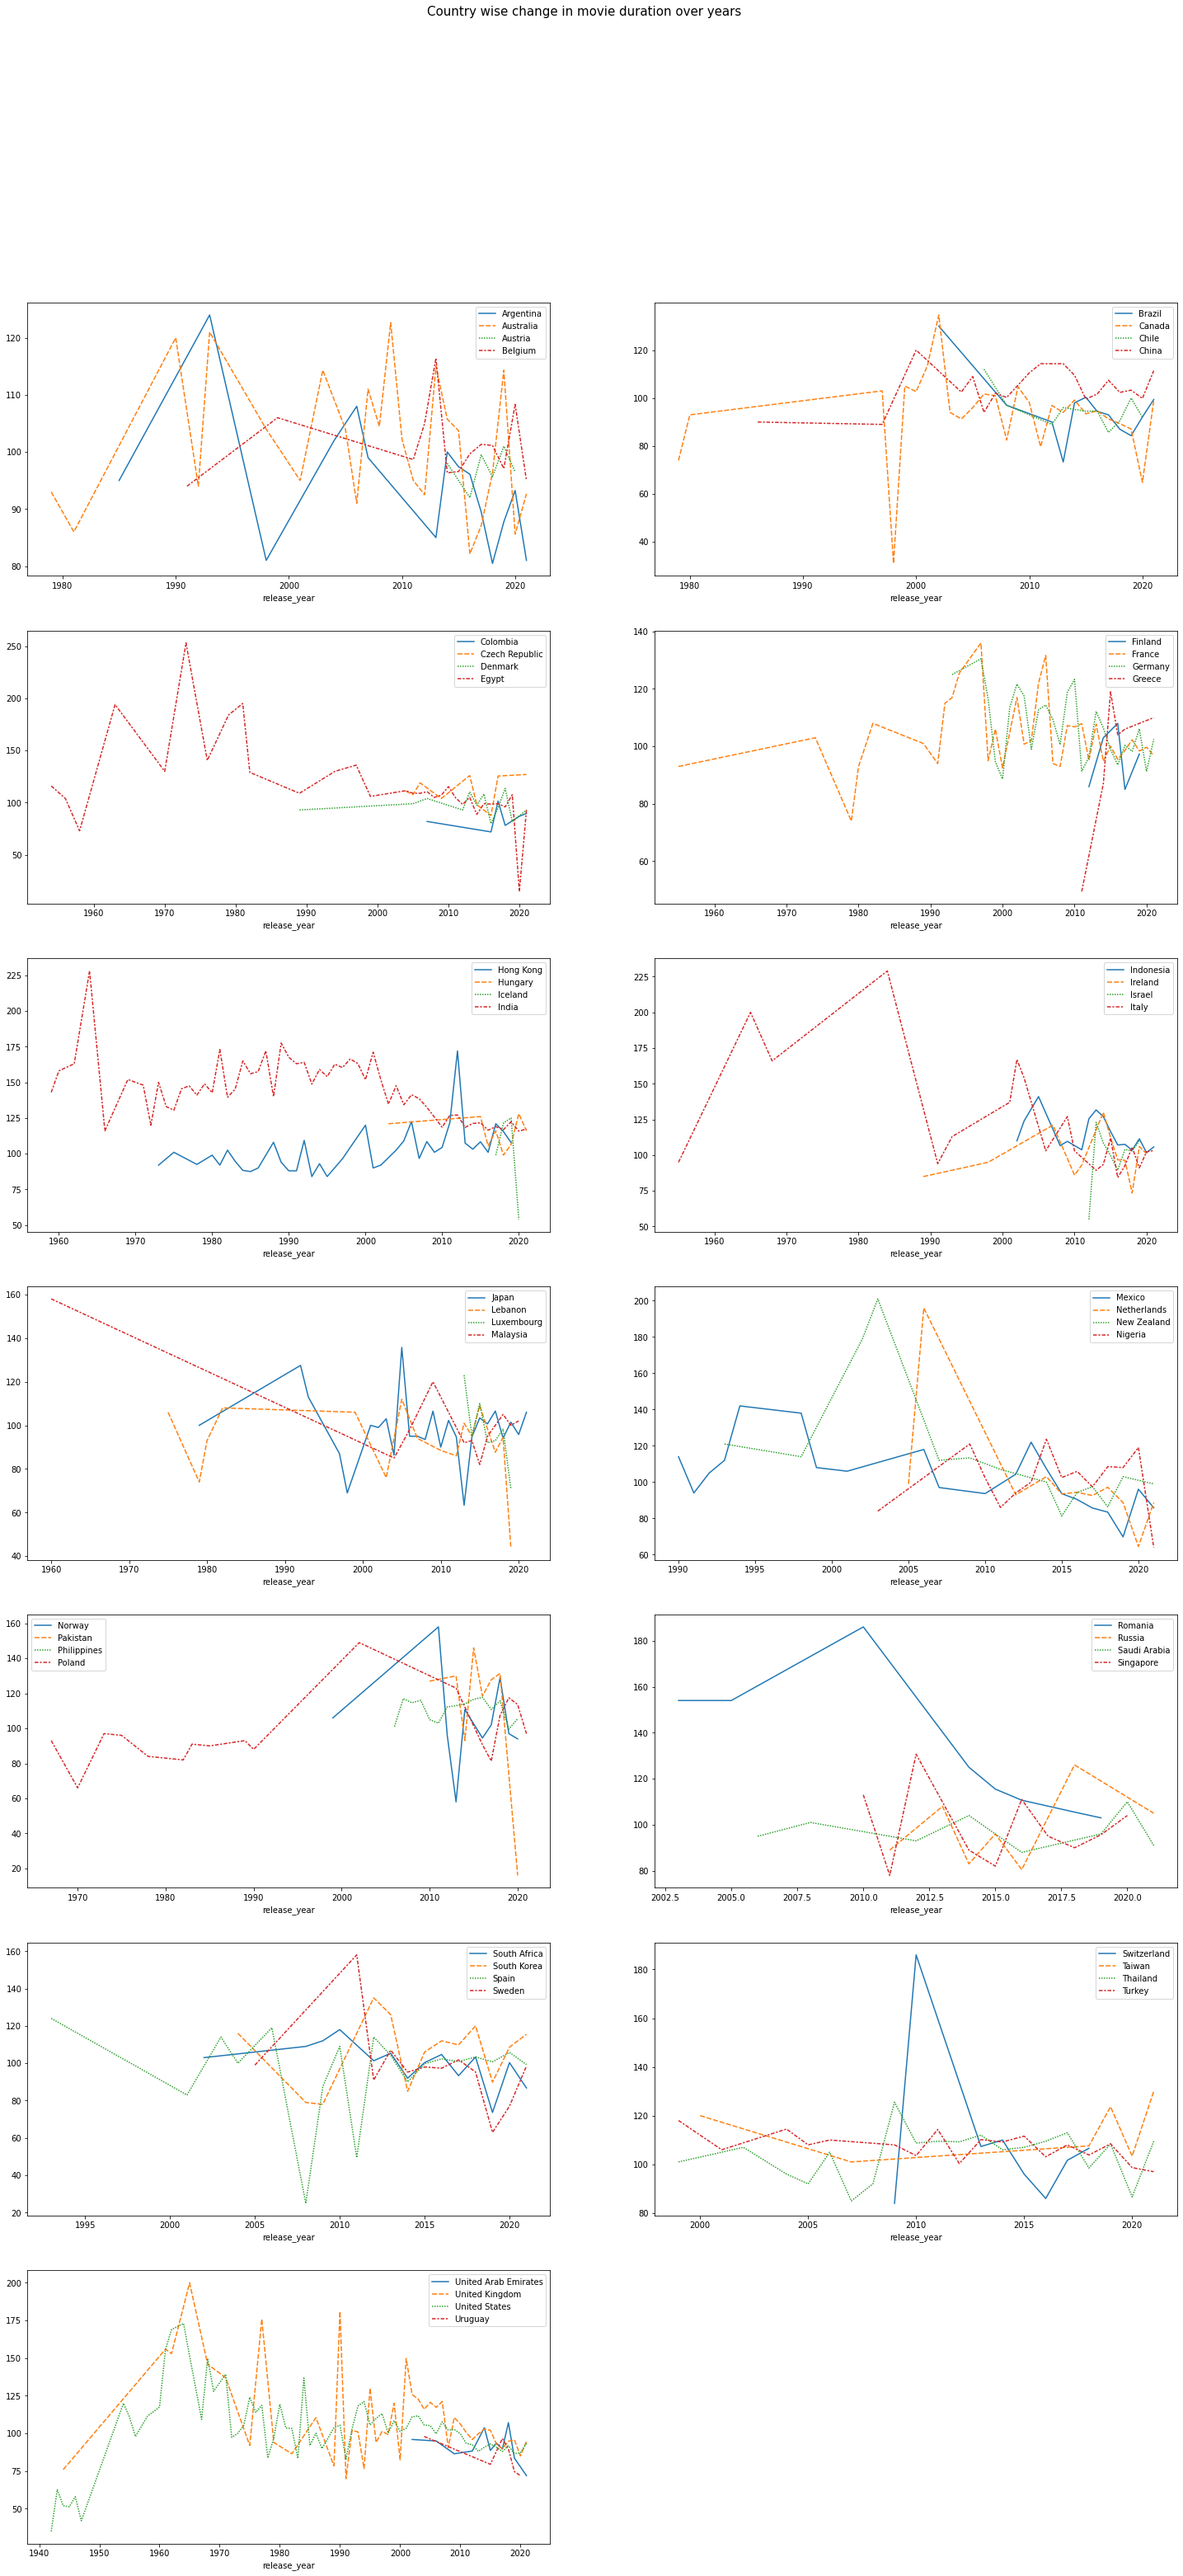

In [1664]:
country_movies_df=country_duration_df.loc[country_duration_df['duration'].str.endswith('min')]
country_movies_df.loc[:,'duration']=country_movies_df.loc[:,'duration'].str.split(expand=True).drop(1,axis=1)[0].astype(int)
country_movies_df=country_movies_df.dropna(how="all",subset=['country'])
country_movies_df['release_year']=country_movies_df['release_year'].astype('int')
country_movies_df=pd.pivot_table(country_movies_df,index='release_year',columns='country',values='duration',aggfunc=np.mean).reset_index()
country_movies_df.columns.name=None
country_movies_df.index=country_movies_df['release_year']
country_movies_df=country_movies_df.drop('release_year',axis=1)


plt.figure(figsize=(25,50))
plt.suptitle('Country wise change in movie duration over years',fontsize=15)
number=1
for i in range(13):
    k=i*4
    plt.subplot(7,2,number)
    sns.lineplot(country_movies_df.iloc[:,k:k+4])
    number+=1


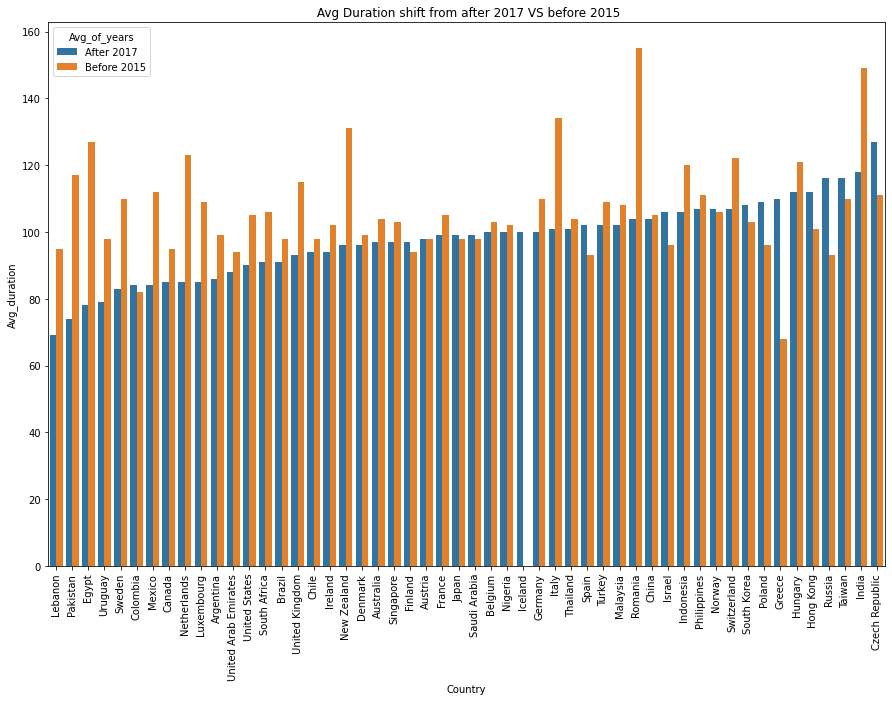

In [1665]:

present_country_duration_df=country_movies_df.loc[[2018,2019,2020,2021],:].mean().round().to_frame().reset_index().rename({0:"Avg_duration","index":"Country"},axis=1).sort_values(by='Avg_duration')
filtered=country_movies_df[country_movies_df.index<2015].mean().round().to_frame().reset_index().rename({0:"Avg_duration","index":"Country"},axis=1).sort_values(by='Avg_duration')
filtered['Avg_of_years']='Before 2015'
present_country_duration_df['Avg_of_years']='After 2017'
comparison_df=pd.concat([present_country_duration_df,filtered],ignore_index=True)
plt.figure(figsize=(15,10))
sns.barplot(comparison_df,x='Country',y='Avg_duration',hue='Avg_of_years')
plt.title(' Avg Duration shift from after 2017 VS before 2015')
plt.xticks(rotation=90)
plt.show()

### Inferences

From above graph on change in duration per country every year and avg duration comparison of before 2015 vs after 2017.

1. A general trend of decrease in  duration of movie over year has taken place mostly in 80 min to 100 min but some country has shown a trend of increase in duration in comparison to before 2015 such as colombia,finland,japan,saudi-arabia,spain,israel,norway,south korea,poland,greece,hong kong,russia,taiwan,czech republic


D:\anaconda\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



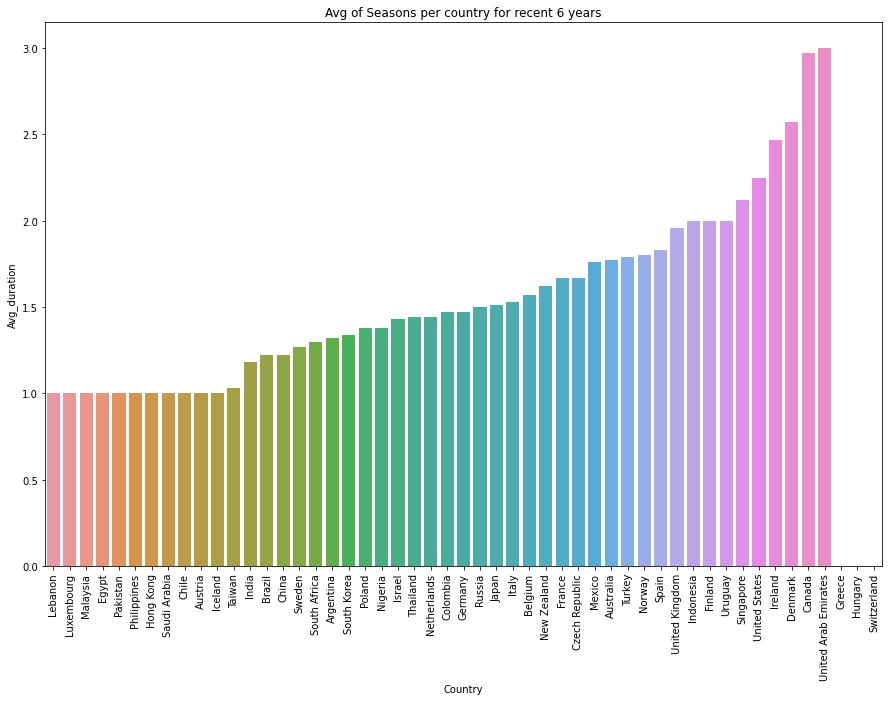

In [1666]:
country_season_df=country_duration_df.loc[(country_duration_df['duration'].str.endswith('Seasons')) | (country_duration_df['duration'].str.endswith('Season'))]
country_season_df.loc[:,'duration']=country_season_df.loc[:,'duration'].str.split(expand=True).drop(1,axis=1)[0].astype(int)
country_season_df=country_season_df.dropna(how="all",subset=['country'])
country_season_df['release_year']=country_season_df['release_year'].astype('int')
country_season_df=pd.pivot_table(country_season_df,index='release_year',columns='country',values='duration',aggfunc=np.mean).reset_index()
country_season_df.columns.name=None
country_season_df.index=country_season_df['release_year']
country_season_df=country_season_df.drop('release_year',axis=1)

country_season_df=country_season_df.loc[[2016,2017,2018,2019,2020,2021],:].mean().round(2).to_frame().reset_index().rename({0:"Avg_duration","index":"Country"},axis=1).sort_values(by='Avg_duration')

plt.figure(figsize=(15,10))
sns.barplot(country_season_df,x='Country',y='Avg_duration')
plt.title('Avg of Seasons per country for recent 6 years')
plt.xticks(rotation=90)
plt.show()


In [1667]:
rating_distribution_df=netflix_data[['rating','type']]

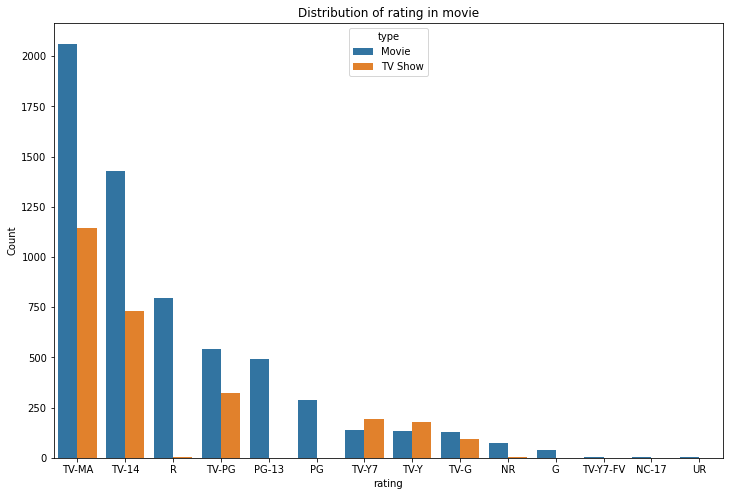

In [1668]:

rating_movies_df=rating_distribution_df.value_counts().to_frame().rename({0:'Count'},axis=1).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(rating_movies_df,y='Count',x='rating',hue='type')
plt.title("Distribution of rating in movie")
plt.show()

### Inferences

Inferences from above graphs of Movies/TV Show Count is ------

1. Most of the movies and tv show content is available in either 17+ age or 18+ age with rating as R and TV-MA and then 13+ or 14+ age content and then comes small kids content or general age audience.

In [1669]:
country_filtered_8_df=country_df['country'].value_counts().to_frame()
def filtering(x):
    return x in country_filtered_8_df[country_filtered_8_df['country']>8].index.values
country_filtered_8_df=country_df[country_df['country'].apply(filtering)]


In [1670]:
rating_country_df=rating_distribution_df.drop('type',axis=1).merge(country_filtered_8_df,how='inner',on='show_id').groupby(by=['country','rating'],sort=False).count().reset_index().rename({'show_id':'Count'},axis=1).sort_values(by=['country','Count'],ascending=False).groupby('country').head(4)
# fig=pl.treemap(rating_country_df,path=[pl.Constant("Country"),'country','rating'],values='Count',color='rating',title='Top 4 rating per country')
# fig.update_layout(margin = dict(t=50, l=50, r=25, b=25))
# fig.show()
pl.sunburst(rating_country_df,path=['country','rating'],values='Count',color='rating',title='Top 4 rating per country')

In [1671]:
month_movie_df=netflix_data[['type','date_added']]
month_movie_df=month_movie_df[month_movie_df['type']=='Movie']
month_movie_df['date_added']=month_movie_df['date_added'].dt.month_name()
month_movie_df=month_movie_df['date_added'].value_counts().to_frame().rename({'date_added':'Count'},axis=1)
print("--------------------Shows Month wise movies addition to netflix---------------------------------")
month_movie_df

--------------------Shows Month wise movies addition to netflix---------------------------------


,Count
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498
June,492


In [1672]:
month_tv_show_df=netflix_data[['type','date_added']]
month_tv_show_df=month_tv_show_df[month_tv_show_df['type']=='TV Show']
month_tv_show_df['date_added']=month_tv_show_df['date_added'].dt.month_name()
month_tv_show_df=month_tv_show_df['date_added'].value_counts().to_frame().rename({'date_added':'Count'},axis=1)
print("--------------------Shows Month wise TV show addition to netflix---------------------------------")
month_tv_show_df


--------------------Shows Month wise TV show addition to netflix---------------------------------


,Count
December,266
July,262
September,251
August,236
June,236
October,215
April,214
March,213
November,207
May,193


### Inferences

Inferences from above tables --------

1. Mostly movies are added to netflix in july,april,december,januray,october and TV show are added during december,july,september

In [1673]:
# last 30 year top actor per genre 
cast_genre_df=cast_df.to_frame().merge(netflix_data['type'],how='inner',on='show_id').merge(genre_df,how='inner',on='show_id').dropna(how='all',subset=['cast'])
cast_genre_df=cast_genre_df[cast_genre_df['release_year'].astype(int)>1990]

In [1674]:
#Movie
cast_genre_movie_df=cast_genre_df[cast_genre_df['type']=='Movie'].drop(['type','release_year'],axis=1).groupby(by=['listed_in','cast'],sort=False).count().reset_index().sort_values(by=['listed_in','show_id'],ascending=False).groupby('listed_in').head(5)
cast_genre_movie_df.index=[1,2,3,4,5]*20
print("-----------------------------------Best actor per  movies genre------------------------ ")
cast_genre_movie_df.pivot(columns='listed_in',values='cast')


-----------------------------------Best actor per  movies genre------------------------ 


listed_in,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
1,Bruce Willis,Yuki Kaji,Julie Tejwani,Harvey Keitel,Anupam Kher,Robb Wells,Samuel West,Shah Rukh Khan,Selva Rasalingam,Michael Gross,Rajit Kapoor,Anupam Kher,Margaret Cho,Stephen Fry,Akshay Kumar,Akshay Kumar,Fred Tatasciore,Emily Morris,Kevin Hart,Nicolas Cage
2,Anupam Kher,Junko Takeuchi,Rupa Bhimani,Mary Steenburgen,Adam Sandler,John Paul Tremblay,Craig Sechler,Anupam Kher,Mourad Zaoui,Tony Todd,Konkona Sen Sharma,Shah Rukh Khan,Andrew Rannells,Cassandra Morris,Anil Kapoor,Anupam Kher,Laurence Fishburne,Adam Tuominen,Jeff Dunham,Ben Kingsley
3,Shah Rukh Khan,Chie Nakamura,Rajesh Kava,Ben Kingsley,Paresh Rawal,John Dunsworth,Wille Lindberg,Naseeruddin Shah,El Mahmoudi M'Barek,Aishwarya Rajesh,Adil Hussain,Akshay Kumar,Zachary Quinto,David Spade,Katrina Kaif,Shah Rukh Khan,Paul Bettany,Jay Baruchel,Katt Williams,Nawazuddin Siddiqui
4,Samuel L. Jackson,Satsuki Yukino,Jigna Bhardwaj,Bill Hunter,Shah Rukh Khan,Patrick Roach,David Attenborough,Nawazuddin Siddiqui,Abdelilah Wahbi,Vidhu,Tannishtha Chatterjee,Kareena Kapoor,Charlie Carver,London Hughes,Kareena Kapoor,Salman Khan,Nicolas Cage,Liev Schreiber,Tom Segura,Jennifer Jason Leigh
5,Nicolas Cage,Houko Kuwashima,Vatsal Dubey,Clint Eastwood,Boman Irani,Lucy Decoutere,Quincy Jones,Paresh Rawal,Ait Youssef Youssef,Surya Ganapathy,Mark Duplass,Boman Irani,Supanart Jittaleela,Fortune Feimster,Gulshan Grover,Taylor Lautner,Hugo Weaving,Jeff Bridges,Jim Jefferies,Nana Patekar


In [1675]:
#TV Show
cast_genre_tv_show_df=cast_genre_df[cast_genre_df['type']=='TV Show'].drop(['type','release_year'],axis=1).groupby(by=['listed_in','cast'],sort=False).count().reset_index().sort_values(by=['listed_in','show_id'],ascending=False).groupby('listed_in').head(5)
cast_genre_tv_show_df.index=[1,2,3,4,5]*22
cast_genre_tv_show_df=cast_genre_tv_show_df.pivot(columns='listed_in',values='cast')
cast_genre_tv_show_df.columns.name=None
print("-----------------------------------Best actor per TV show genre------------------------ ")
cast_genre_tv_show_df.iloc[:,:11]

-----------------------------------Best actor per TV show genre------------------------ 


,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,Science & Nature TV
1,Takahiro Sakurai,David Attenborough,Lennie James,Diego VÃ¡squez,David Attenborough,Takahiro Sakurai,Vincent Tong,Hong Bum-ki,Paul Hollywood,Amanda Chou,David Attenborough
2,Yuki Kaji,Paul Hollywood,John Dunsworth,Juan Pablo Urrego,David Chang,Yuki Kaji,Ashleigh Ball,Um Sang-hyun,You,Patrick Lee,Erik Thompson
3,Ai Kayano,Kate Harbour,Matt LeBlanc,Luis Roberto GuzmÃ¡n,Paik Jong-won,Junichi Suwabe,Grey Griffin,Kim Won-hae,Reina Triendl,James Wen,Bob Brisbane
4,Junichi Suwabe,Greg Davies,Matt Berry,Yuki Kaji,Nicholas Day,Ai Kayano,Michela Luci,Sung Dong-il,Yoshimi Tokui,Jack Lee,Robert Clotworthy
5,Yuichi Nakamura,Harriet Walter,Kelsey Grammer,Alejandro Speitzer,Will Smith,Daisuke Ono,Tara Strong,Yoo Yeon-seok,Azusa Babazono,Chris Wang,Liz Bonnin


In [1676]:
print("-----------------------------------Best actor per TV show genre------------------------ ")
cast_genre_tv_show_df.iloc[:,11:]

-----------------------------------Best actor per TV show genre------------------------ 


,Spanish-Language TV Shows,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,Juan Pablo Urrego,Fortune Feimster,Steven Yeun,Grey Griffin,Tay Ping Hui,Henry Thomas,Henry Thomas,Grey Griffin,Bob Ross,Yusuke Kobayashi,Takahiro Sakurai
2,Maxi Iglesias,Supriya Joshi,Lena Headey,Tony Hale,Jeanette Aw,Rahul Kohli,Kate Siegel,Tom Kenny,Hakeem Kae-Kazim,Ai Kayano,Ai Kayano
3,Camila Sodi,Yamaneika Saunders,Mike Colter,James Wen,Zhang Zhenhuan,Kate Siegel,Rahul Kohli,Lena Headey,Chioma Omeruah,Takehito Koyasu,Yuichi Nakamura
4,Sergio HernÃ¡ndez,Jeff Ross,Jon Bernthal,Fortune Feimster,Mike Colter,Manny Jacinto,Jim Watson,Fred Tatasciore,Orukotan Adejola,Yuhko Kaida,Hiroshi Kamiya
5,Robinson DÃ­az,Natasha Leggero,Mark Hamill,Tom Kenny,Frederick Lee,Megumi Han,Mercedes Morris,Mark Hamill,Flora Chiedo,Engin Ã–ztÃ¼rk,Nobuhiko Okamoto


In [1677]:
cast_country_genre_df=cast_genre_df.merge(country_df,how='inner',on='show_id').dropna(how='all',subset=['country'])


In [1678]:

cast_country_genre_movie_df=cast_country_genre_df.loc[(cast_country_genre_df['type']=='Movie'),['show_id','cast','country','listed_in']].groupby(by=['country','listed_in','cast'],sort=False).count().reset_index().sort_values(by=['country','listed_in','show_id'],ascending=False).groupby(['country','listed_in']).head(3)
cast_country_genre_movie_df=cast_country_genre_movie_df.loc[cast_country_genre_movie_df['show_id']>2,['country','listed_in','cast']]
pl.treemap(cast_country_genre_movie_df, path=[pl.Constant("Country"), 'country', 'listed_in', 'cast'],title='Country wise top 3 actors of movies per genre')


In [1679]:
cast_country_genre_tv_show_df=cast_country_genre_df.loc[(cast_country_genre_df['type']=='TV Show'),['show_id','cast','country','listed_in']].groupby(by=['country','listed_in','cast'],sort=False).count().reset_index().sort_values(by=['country','listed_in','show_id'],ascending=False).groupby(['country','listed_in']).head(3)
cast_country_genre_tv_show_df=cast_country_genre_tv_show_df.loc[cast_country_genre_tv_show_df['show_id']>2,['country','listed_in','cast']]
pl.treemap(cast_country_genre_tv_show_df, path=[pl.Constant("Country"), 'country', 'listed_in', 'cast'],title='Country wise top 3 actors of Tv Show per genre')

In [1685]:
# last 30 year top director per genre 
genre_director_df=director_df.to_frame().merge(netflix_data[['type']],how='inner',on='show_id').merge(genre_df,how='inner',on='show_id').dropna(how='all',subset=['director'])
genre_director_df=genre_director_df[genre_director_df['release_year'].astype('int')>1990]

In [1687]:
# movie
genre_director_movie_df=genre_director_df[genre_director_df['type']=='Movie'].drop(['type','release_year'],axis=1).groupby(['listed_in','director'],sort=False).count().sort_values(['listed_in','show_id'],ascending=False).reset_index().groupby(['listed_in']).head(4)
genre_director_movie_df=genre_director_movie_df.drop('show_id',axis=1)
genre_director_movie_df.index=[1,2,3,4]*20
print("-----------------------------------Best director per  genre------------------------ ")
genre_director_movie_df.pivot(columns='listed_in',values='director')

-----------------------------------Best director per movies genre------------------------ 


listed_in,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
1,Don Michael Paul,Toshiya Shinohara,Rajiv Chilaka,Wolfgang Petersen,David Dhawan,Mike Clattenburg,Vlad Yudin,Cathy Garcia-Molina,David Batty,Rocky Soraya,Paul Thomas Anderson,Cathy Garcia-Molina,Leigh Janiak,Louis C.K.,Matt Askem,Cathy Garcia-Molina,Lana Wachowski,Vlad Yudin,Jan Suter,Rathindran R Prasad
2,Toshiya Shinohara,Masahiko Murata,Suhas Kadav,Jane Campion,Suhas Kadav,Kevin Smith,Thierry Donard,Hanung Bramantyo,Note Chern-Yim,Poj Arnon,Noah Baumbach,YÄ±lmaz ErdoÄŸan,Jun Lana,George Ford,Suhas Kadav,Justin G. Dyck,Lilly Wachowski,Chapman Way,RaÃºl Campos,David Fincher
3,Hidenori Inoue,Hiroyuki Seshita,Prakash Satam,Marcelo PiÃ±eyro,Hakan AlgÃ¼l,George Jackson,Barry Avrich,Hidenori Inoue,Alexandre Avancini,Rathindran R Prasad,Qaushiq Mukherjee,David Dhawan,Matt Kugelman,Mike Smith,Paul Dugdale,Mae Czarina Cruz,Paul W.S. Anderson,Maclain Way,Marcus Raboy,Brad Anderson
4,S.S. Rajamouli,Noriyuki Abe,Robert Rodriguez,Lasse HallstrÃ¶m,Prakash Satam,Doug McHenry,Luis Ara,S.S. Rajamouli,Harold Cronk,Scott Stewart,Lynn Shelton,Hakan AlgÃ¼l,Saratswadee Wongsomphet,John Paul Tremblay,Lucas Margutti,Roger Kumble,Peter Jackson,Clay Glen,Jay Karas,Anurag Kashyap


In [1682]:
genre_country_director_movie_df=genre_director_df[genre_director_df['type']=='Movie'].drop(['type','release_year'],axis=1).merge(country_df,how='left',on='show_id').dropna(how='all',subset=['country']).groupby(['country','listed_in','director'],sort=False).count().sort_values(by=['country','listed_in','show_id'],ascending=False).reset_index().groupby(by=['country','listed_in'],sort=False).head(4)
genre_country_director_movie_df=genre_country_director_movie_df[genre_country_director_movie_df['show_id']>2]
genre_country_director_movie_df=genre_country_director_movie_df.drop('show_id',axis=1)
pl.treemap(genre_country_director_movie_df,path=[pl.Constant('Country'),'country','listed_in','director'],title='Country wise top 3 directors of movies per genre')

### Inferences

Some interesting facts observed during above analyse ------

1. Most of the Director values in TV Show type were null.


In [1683]:
#per Country Movies to TV show percentage
country_content_type_df=country_df.dropna(how='all',subset=['country']).merge(netflix_data['type'],how='inner',on='show_id').groupby(['country','type']).count().reset_index()

country_content_type_total_df=country_df.dropna(how='all',subset=['country']).merge(netflix_data['type'],how='inner',on='show_id').groupby(['country']).count().reset_index().drop('type',axis=1).sort_values('show_id',ascending=False)
country_content_type_df=country_content_type_total_df[:20].merge(country_content_type_df,how='inner',on='country').rename({'show_id_x':"Country_total_content","show_id_y":"Country_type_wise_total"},axis=1).sort_values('Country_total_content',ascending=False)
country_content_type_df['Percentage']=(country_content_type_df['Country_type_wise_total']/country_content_type_df['Country_total_content'])*100

country_content_type_df.columns.name=None

country_content_type_df=country_content_type_df.pivot(columns='type',index='country',values='Percentage').sort_values('Movie',ascending=True).reset_index()
pl.bar(country_content_type_df,x='country',y=country_content_type_df.columns,title='Top 20 Content providing countries Movie Vs TV show percentage')

### Inferences

Inferences from above graph ----------

1. Content from hong kong, india,nigeria is moslty of type movies were as south korea,japan is moslty of type tv show

In [1684]:
content_age_df=country_df.merge(netflix_data['rating'],on='show_id').dropna(how='any',subset=['country','rating'])
def class_def(x):
    if x=='TV-MA' or x=='R' or x=='NC-17':
        return 'Adults'
    elif x=='PG-13' or x=='TV-14' :
        return "Teens"
    elif x=='PG' or x=='TV-PG' or x=='TV-Y' or x=='TV-Y7':
        return 'Kids'
    elif x=='TV-G' or x=='G':
        return 'General'
    else:
        return "Other"
content_age_df['Age_rating']=content_age_df['rating'].apply(class_def)
content_age_df=content_age_df.drop('rating',axis=1)
content_age_df=content_age_df.groupby(by=['country','Age_rating'],sort=False).count().reset_index().pivot(columns='Age_rating',index='country',values='show_id').dropna(how='any',subset=('Adults','Teens','Kids'))

content_age_df['total']=content_age_df.sum(axis=1)
content_age_df=content_age_df.sort_values('total',ascending=False)[:14]
content_age_df=content_age_df.apply(lambda x: round((x/content_age_df['total']),2)*100,axis=0).reset_index().drop('total',axis=1)
content_age_df.columns.name=None
pl.bar(content_age_df,x='country',y=content_age_df.columns,title='Top 14 Countries Age wise Content division')

### Inferences

Inferences from above graph-----

1. India,egypt,japan,china has most of the content of teen age group and very less content of mature age.
2. Spain,germany,mexico,turkey has most of the content of mature age and very less content of mature age group.


### Recommendations

1. To Produce movie :--
    1. Recommended Genre to go for during producing movie -----international movies,dramas,comedies,documentaries,independent movies,children and family movies 
    
    (*Data referred for recommendation(ln[1659])*)
    2. Recommended Movie duration ----Between 90 mins to 105 mins 
    
    (*Data referred for recommendation(ln[1661])*)
    3. Recommended rating to launch under ----- Adult or teen as the audience size is big and most of the content of netflix is mature content which make it more tilted towards teen and adult audience.
    
    (*Data referred for recommendation(ln[1668])*)
    4. Recommended cast/director ------- Based upon genres picked for movie we can have most experienced cast/director based on the number of movies the worked.
    
    (*Data to refer for actor/directors(ln[1675]/ln[1687])*)
2. To Produce TV Show:--
    1. Recommended Genre to go for during producing TV Show -----International Tv Show,TV Dramas,TV comedies,Docuseries,Crime TV Show

    (*Data referred for recommendation(ln[1660])*)
    2. Recommended No of Seasons for TV show  ---- 2 or 3 seasons
    
    (*Data referred for recommendation(ln[1662])*)
    3. Recommended rating to launch under ----- Adult or teen as the audience size is big and most of the content of netflix is mature content which make it more tilted towards teen and adult audience.
    
    (*Data referred for recommendation(ln[1668])*)
    4. Recommended cast ------- Based upon genres picked for TV show we can have most experienced cast based on the no of tv show the worked .
    
    (*Data to refer for actor(ln[1676])*) 
    
    
3. Country wise business growth -------
    1. For South Korea------ Producing more TV show or adding famous tv show can help more in growth 
    (*Data referred for recommendation(ln[1683])*)
    2. For India-------- Producing more Movies will help in growth and rating preferred is teen/14+
    (*Data referred for recommendation(ln[1683],ln[1684])*)
    3. For Japan------ Producing more Tv show in teen/14+ categorie
    (*Data referred for recommendation(ln[1683],ln[1684])*)